# AWS Billing Report 

https://d-906760626e.awsapps.com/start


## Git Commands
### git config user.name jorgeerodriguez
### git config user.email tri.jorge_rodriguez@yahoo.com



In [1]:
import boto3
from datetime import date
from dateutil.relativedelta import relativedelta
import seaborn as sns
import pandas as pd
import subprocess
from time import time, sleep
import webbrowser
from boto3.session import Session
import matplotlib.pyplot as plt


https://stackoverflow.com/questions/62311866/how-to-use-the-aws-python-sdk-while-connecting-via-sso-credentials

In [2]:
# if your sso is setup in a different region, you will
# want to include region_name=sso_region in the 
# session constructor below

def AWS_SSO_Login():
    session = Session()
    start_url = 'https://d-906760626e.awsapps.com/start'
    region = 'us-east-1' 
    sso_oidc = session.client('sso-oidc',region_name=region)
    client_creds = sso_oidc.register_client(
        clientName='myapp',
        clientType='public',
    )
    device_authorization = sso_oidc.start_device_authorization(
        clientId=client_creds['clientId'],
        clientSecret=client_creds['clientSecret'],
        startUrl=start_url,
    )
    url = device_authorization['verificationUriComplete']
    device_code = device_authorization['deviceCode']
    expires_in = device_authorization['expiresIn']
    interval = device_authorization['interval']
    webbrowser.open(url, autoraise=True)
    for n in range(1, expires_in // interval + 1):
        sleep(interval)
        try:
            token = sso_oidc.create_token(
                grantType='urn:ietf:params:oauth:grant-type:device_code',
                deviceCode=device_code,
                clientId=client_creds['clientId'],
                clientSecret=client_creds['clientSecret'],
            )
            return_code = True
            break
        except sso_oidc.exceptions.AuthorizationPendingException:
            return_code = False
            pass
    return return_code,session,token

In [3]:
def Get_AWS_Account_Keys(session, token, account_no):
    region = 'us-east-1'
    account_id = account_no
    access_token = token['accessToken']
    sso = session.client('sso',region_name=region)
    account_roles = sso.list_account_roles(
        accessToken=access_token,
        accountId=account_id,
    )
    #print(account_roles)
    roles = account_roles['roleList'] # 'roleList'
    # simplifying here for illustrative purposes
    role = roles[0]
    #-------------
    #print(role)
    #-------------
    # earlier versions of the sso api returned the 
    # role credentials directly, but now they appear
    # to be in a subkey called `roleCredentials`
    if role['roleName'] == 'MarketplaceRead':
        role['roleName'] = 'BillingReadOnly'

    role_creds = sso.get_role_credentials(
        roleName=role['roleName'],
        #roleName='ReadOnly',
        accountId=account_id,
        accessToken=access_token,
    )['roleCredentials']
    #print(role_creds)
    session = Session(
        region_name=region,
        aws_access_key_id=role_creds['accessKeyId'],
        aws_secret_access_key=role_creds['secretAccessKey'],
        aws_session_token=role_creds['sessionToken'],
    )
    #-------------
    #print(role)
    #-------------
    return role_creds

# Accounts in AWS

## Enviroment values: production, development, sandbox, share services, non-prod

In [4]:
aws_name_accounts = []
# ======== >>>  Amperwave accounts <<< =========
#-----------------------------------------------
aws_account_name = 'AmperWave_Prod'
aws_account = '847645690781'
aws_enviroment = 'production'
aws_graph = 'yes'
aws_access = 'yes'
record = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]
aws_name_accounts.append(record)
#-----------------------------------------------
aws_account_name = 'AmperWave-NonProd'
aws_account = '194118743403'
aws_enviroment = 'production'
aws_graph = 'yes'
aws_access = 'yes'
record = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]
aws_name_accounts.append(record)
#-----------------------------------------------
aws_account_name = 'WO On Demand'
aws_account = '673312057223'
aws_enviroment = 'production'
aws_graph = 'yes'
aws_access = 'yes'
record = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]
aws_name_accounts.append(record)
#-----------------------------------------------
aws_account_name = 'WOS-PROD-01'
aws_account = '365148103379'
aws_enviroment = 'production'
aws_graph = 'yes'
aws_access = 'yes'
record = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]
aws_name_accounts.append(record)
#-----------------------------------------------


In [4]:
aws_name_accounts = []
#-----------------------------------------------
aws_account_name = 'Entercom Communications'
aws_account = '724972922289'
aws_enviroment = 'production'
aws_graph = 'yes'
aws_access = 'yes' # yes This is the MAIN Account
record = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]
aws_name_accounts.append(record)
#---------------------------------a2 prod --------------
'''
aws_account_name = 'Aardvark2-Prod A2'
aws_account = '910555647794'
aws_enviroment = 'production'
aws_enviroment = 'production'
aws_graph = 'yes'
aws_access = 'yes'
record = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]
aws_name_accounts.append(record)
#--------------------------------Data Tean ---------------
aws_account_name = 'AdvancedAudio Data Team'
aws_account = '900072481376'
aws_enviroment = 'production'
aws_graph = 'yes'
aws_access = 'no' # no access in AWS
record = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]
aws_name_accounts.append(record)
#-----------------------------------------------
aws_account_name = 'AmperWave_Prod'
aws_account = '847645690781'
aws_enviroment = 'production'
aws_graph = 'yes'
aws_access = 'yes'
record = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]
aws_name_accounts.append(record)
#-----------------------------------------------
aws_account_name = 'AmperWave-NonProd'
aws_account = '194118743403'
aws_enviroment = 'production'
aws_graph = 'yes'
aws_access = 'yes'
record = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]
aws_name_accounts.append(record)
#------------------------------A1 -----------------
aws_account_name = 'cobradev A1'
aws_account = '094289890028'
aws_enviroment = 'production'
aws_graph = 'no'
aws_access = 'no' # no accdsz in AWS
record = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]
aws_name_accounts.append(record)
#-------------------------------AW ??? ----------------
aws_account_name = 'Core Dev A1 or AW'
aws_account = '110926662372'
aws_enviroment = 'production'
aws_graph = 'no'
aws_access = 'no' # no Access in AWS
record = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]
aws_name_accounts.append(record)
#---------------------------------A1 --------------
aws_account_name = 'cobraprod A1'
aws_account = '094289890028 '
aws_enviroment = 'production'
aws_graph = 'no'
aws_access = 'no' # This account canot be accces by code
record = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]
aws_name_accounts.append(record)
#-------------------------------A1----------------
aws_account_name = 'Entercom A1'
aws_account = '787242951186'
aws_enviroment = 'production'
aws_graph = 'no'
aws_access = 'no' # no access to AWS 
record = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]
aws_name_accounts.append(record)
#----------------------------------A1-------------
aws_account_name = 'Entercom Production A1'
aws_account = '477779916141'
aws_enviroment = 'production'
aws_graph = 'no'
aws_access = 'no' # no access to AWS
record = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]
aws_name_accounts.append(record)
#------------------------------- ?? ----------------
aws_account_name = 'Metadata Dev'
aws_account = '406307397670'
aws_enviroment = 'production'
aws_graph = 'no'
aws_access = 'no' # no access to AWS
record = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]
aws_name_accounts.append(record)
#------------------------------ROC-----------------
aws_account_name = 'OpsConsole-NonProd ROC'
aws_account = '659560379904'
aws_enviroment = 'production'
aws_graph = 'yes'
aws_access = 'yes' # yes
record = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]
aws_name_accounts.append(record)
#-------------------------------A2----------------
aws_account_name = 'Personalization A2'
aws_account = '354704368578'
aws_enviroment = 'production'
aws_graph = 'no'
aws_access = 'no' # no acess to AWS
record = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]
aws_name_accounts.append(record)
#------------------------------- A2 ??? ----------------
aws_account_name = 'PubCMSDev A2'
aws_account = '643170364694'
aws_enviroment = 'production'
aws_graph = 'no'
aws_access = 'no' # no access to AWS
record = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]
aws_name_accounts.append(record)
#-----------------------------------------------
aws_account_name = 'Shared_Services'
aws_account = '477185329132'
aws_enviroment = 'production'
aws_graph = 'no'
aws_access = 'no' # no access to AWS
record = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]
aws_name_accounts.append(record)
#---------------------------- ?? -------------------
aws_account_name = 'uap-sandbox'
aws_account = '372074449155'
aws_enviroment = 'production'
aws_graph = 'no'
aws_access = 'no' # no access to AWS
record = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]
aws_name_accounts.append(record)
#-----------------------------------------------
aws_account_name = 'Unity Dev'
aws_account = '077691119997'
aws_enviroment = 'production'
aws_graph = 'no'
aws_access = 'no' # no access to AWS
record = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]
aws_name_accounts.append(record)
#-----------------------------------------------
aws_account_name = 'UserTokenSandbox'
aws_account = '967638613557'
aws_enviroment = 'production'
aws_graph = 'yes'
aws_access = 'yes'
record = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]
aws_name_accounts.append(record)
#-----------------------------------------------
aws_account_name = 'WO On Demand'
aws_account = '673312057223'
aws_enviroment = 'production'
aws_graph = 'yes'
aws_access = 'yes'
record = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]
aws_name_accounts.append(record)
#-----------------------------------------------
aws_account_name = 'WOS-PROD-01'
aws_account = '365148103379'
aws_enviroment = 'production'
aws_graph = 'yes'
aws_access = 'yes'
record = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]
aws_name_accounts.append(record)
#-----------------------------------------------
'''

"\naws_account_name = 'Aardvark2-Prod A2'\naws_account = '910555647794'\naws_enviroment = 'production'\naws_enviroment = 'production'\naws_graph = 'yes'\naws_access = 'yes'\nrecord = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]\naws_name_accounts.append(record)\n#--------------------------------Data Tean ---------------\naws_account_name = 'AdvancedAudio Data Team'\naws_account = '900072481376'\naws_enviroment = 'production'\naws_graph = 'yes'\naws_access = 'no' # no access in AWS\nrecord = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]\naws_name_accounts.append(record)\n#-----------------------------------------------\naws_account_name = 'AmperWave_Prod'\naws_account = '847645690781'\naws_enviroment = 'production'\naws_graph = 'yes'\naws_access = 'yes'\nrecord = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]\naws_name_accounts.append(record)\n#-----------------------------------------------\naws_account_name = 'AmperWave-No

In [5]:
for name_account in aws_name_accounts:
    print(name_account)

['Entercom Communications', '724972922289', 'production', 'yes', 'yes']


## Active Accoutns:

In [6]:
for name_account in aws_name_accounts:
    if name_account[4] == 'yes':
        print(name_account)

['Entercom Communications', '724972922289', 'production', 'yes', 'yes']


## Potential accounts that can be deleted...

In [7]:
for name_account in aws_name_accounts:
    if name_account[4] == 'no':
        print(name_account)

# Access AWS and get the Keys

In [8]:
aws_profiles = []
return_code, session,token = AWS_SSO_Login()
if return_code:
    for name_account in aws_name_accounts:
        if name_account[4] == 'yes':
            print("Getting keys for: " + name_account[0])
            aws_account_name = name_account[0]
            aws_account = name_account[1]
            role_creds = Get_AWS_Account_Keys(session, token, aws_account)
            aws_access_key_id = role_creds['accessKeyId']
            aws_secret_access_key = role_creds['secretAccessKey']
            aws_session_token = role_creds['sessionToken']
            aws_keys = {'name':aws_account_name, 'account': aws_account, 'key':aws_access_key_id, 'access':aws_secret_access_key, 'token':aws_session_token}
            aws_profiles.append(aws_keys)
else:
    print("Unable to Login in AWS SSO")


Getting keys for: Entercom Communications


In [9]:
for profiles in aws_profiles:
    print(profiles['name'])

Entercom Communications


# Get the correct Dates

In [10]:
# Find the start and end dates for last month
today = date.today()
first_day_of_previous_month = (today.replace(day=1) - relativedelta(months=1)).replace(day=1)
last_day_of_previous_month = today.replace(day=1) - relativedelta(days=1)
reportMonth = (today - relativedelta(months=1)).strftime("%b").upper()
reportYear= str(today.year)
#month_name = today.strftime("%b")

In [11]:
reportStart = first_day_of_previous_month.strftime('%Y-%m-%d')
reportEnd = last_day_of_previous_month.strftime('%Y-%m-%d')

## If you waant to set it up Manually:

In [16]:
reportStart = '2025-06-01'
reportEnd = '2025-07-01'
reportYear = '2025'
reportMonth = 'JUN'

In [17]:
print("From: " + reportStart + " To: " + reportEnd)
print('Month: ' + reportMonth)
print('Year: ' + reportYear)

From: 2025-06-01 To: 2025-07-01
Month: JUN
Year: 2025


# Playing wiht Tags.....

In [870]:
data = []
for profiles in aws_profiles:
    print('Getting Billing Information for: ' + profiles['name'])
    aws_account_name = profiles['name']
    aws_account_number = profiles['account']
    aws_access_key_id = profiles['key']
    aws_secret_access_key = profiles['access']
    aws_session_token = profiles['token']

    cost_explorer_client  = boto3.client('ce', aws_access_key_id=aws_access_key_id, 
                                         aws_secret_access_key=aws_secret_access_key,
                                         aws_session_token=aws_session_token)

    time_period = {
        'Start': reportStart,
        'End': reportEnd
    }

    granularity = 'MONTHLY'
    metrics = ['NET_UNBLENDED_COST']

    group_by = [{
        'Type': 'DIMENSION',
        'Key': 'SERVICE'},
        {
        'Type':'TAG',
        'Key':'Environment'
        }
    ]
    response = cost_explorer_client.get_cost_and_usage(
        TimePeriod=time_period, 
        Granularity=granularity, 
        Metrics=metrics, 
        GroupBy=group_by
    )

    #response_tag1 = cost_explorer_client.get_tags(Arn='arn:aws:sts::724972922289:assumed-role/AWSBillingReadOnlyAccess_9298a8a5bf35e9c4/jorge.rodriguez@audacy.com')

    response_tag = cost_explorer_client.get_tags(
        SearchString='',
        TimePeriod=time_period, 
        TagKey='Dev'
        #SortBy=[
        #{
        #    'Key': 'NET_UNBLENDED_COST',
        #    'SortOrder': 'ASCENDING'
        #},]
    )
    
    # Process the response
    results = response['ResultsByTime']
    #print("*"*80)
    #print(results)
    #print("*"*80)
    #data = []
    for result in results:
        for group in result['Groups']:
            service = group['Keys'][0]
            amount = group['Metrics']['NetUnblendedCost']['Amount']
            data.append({
                'Month' : reportMonth,
                'Year' : reportYear,
                'Name' : aws_account_name,
                'Account' : aws_account_number,
                'Service': service,
                'Cost': float(amount)

            })

df = pd.DataFrame(data)

Getting Billing Information for: Entercom Communications


In [871]:
response_tag['Tags']

['']

In [874]:
response.keys()

dict_keys(['GroupDefinitions', 'ResultsByTime', 'DimensionValueAttributes', 'ResponseMetadata'])

# Getting the Billing Information

In [18]:
data = []
for profiles in aws_profiles:
    print('Getting Billing Information for: ' + profiles['name'])
    aws_account_name = profiles['name']
    aws_account_number = profiles['account']
    aws_access_key_id = profiles['key']
    aws_secret_access_key = profiles['access']
    aws_session_token = profiles['token']

    cost_explorer_client  = boto3.client('ce', aws_access_key_id=aws_access_key_id, 
                                         aws_secret_access_key=aws_secret_access_key,
                                         aws_session_token=aws_session_token)

    time_period = {
        'Start': reportStart,
        'End': reportEnd
    }

    granularity = 'MONTHLY'
    metrics = ['NET_UNBLENDED_COST']

    group_by = [{
        'Type': 'DIMENSION',
        'Key': 'SERVICE'},
        {
        'Type':'TAG',
        'Key':'Environment'
        }
    ]
    response = cost_explorer_client.get_cost_and_usage(
        TimePeriod=time_period, 
        Granularity=granularity, 
        Metrics=metrics, 
        GroupBy=group_by
    )

    # Process the response
    results = response['ResultsByTime']
    #print("*"*80)
    #print(results)
    #print("*"*80)
    #data = []
    for result in results:
        for group in result['Groups']:
            service = group['Keys'][0]
            amount = group['Metrics']['NetUnblendedCost']['Amount']
            data.append({
                'Month' : reportMonth,
                'Year' : reportYear,
                'Name' : aws_account_name,
                'Account' : aws_account_number,
                'Service': service,
                'Cost': float(amount),
                'Enviroment': group['Keys'][1]
            })

df = pd.DataFrame(data)
#df_AW = pd.DataFrame(data)

Getting Billing Information for: Entercom Communications


In [15]:
#df_both = pd.concat([df,df_AW], axis=0, ignore_index=True)

In [19]:
df['Enviroment'].unique()

array(['Environment$', 'Environment$prod', 'Environment$nonprod',
       'Environment$Production', 'Environment$dev',
       'Environment$loadtest', 'Environment$shared', 'Environment$stg',
       'Environment$Development', 'Environment$prd', 'Environment$qa',
       'Environment$common', 'Environment$PSFalcon',
       'Environment$management', 'Environment$Dev', 'Environment$global',
       'Environment$sandbox', 'Environment$test', 'Environment$Common',
       'Environment$Sandbox', 'Environment$POC'], dtype=object)

In [20]:
df.shape

(182, 7)

In [21]:
df.sample(10)

,Month,Year,Name,Account,Service,Cost,Enviroment
119,JUN,2025,Entercom Communications,724972922289,Amazon OpenSearch Service,5101.453901,Environment$nonprod
181,JUN,2025,Entercom Communications,724972922289,Tax,7517.260000,Environment$
14,JUN,2025,Entercom Communications,724972922289,AWS Directory Service,267.446996,Environment$
93,JUN,2025,Entercom Communications,724972922289,Amazon Elastic Container Service for Kubernetes,330.300000,Environment$prod
115,JUN,2025,Entercom Communications,724972922289,Amazon Managed Workflows for Apache Airflow,631.518175,Environment$nonprod
113,JUN,2025,Entercom Communications,724972922289,Amazon Managed Grafana,9.000000,Environment$
5,JUN,2025,Entercom Communications,724972922289,AWS CloudFormation,0.000000,Environment$
173,JUN,2025,Entercom Communications,724972922289,AmazonCloudWatch,6563.484837,Environment$
12,JUN,2025,Entercom Communications,724972922289,AWS Database Migration Service,167.258211,Environment$nonprod
88,JUN,2025,Entercom Communications,724972922289,Amazon Elastic Compute Cloud - Compute,33371.502695,Environment$prod


# Saving the Dataframe

## Saving the File in CSV and Excell Format

In [22]:
month = "Monthly_Cost_For_"+reportMonth+"_" + reportYear
df.to_csv(month+".csv")
df.to_excel(month+".xlsx",index=False)

In [23]:
df.shape


(182, 7)

In [24]:
total_per_account_df = df.groupby(['Year','Month','Name']).agg({'Cost':'sum'})
total_per_account_df['Total in Thousands'] = total_per_account_df['Cost']/1000
total_per_account_df

,,,Cost,Total in Thousands
Year,Month,Name,,
2025,JUN,Entercom Communications,333922.402565,333.922403


In [25]:
total_per_month_df = df.groupby(['Year','Month']).agg({'Cost':'sum'})
total_per_month_df

,,Cost
Year,Month,
2025,JUN,333922.402565


# Visulization of the Accounts...

/var/folders/bc/rbbb9nc96zd3bj2l2mq3klq00000gp/T/ipykernel_44732/2313412371.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')


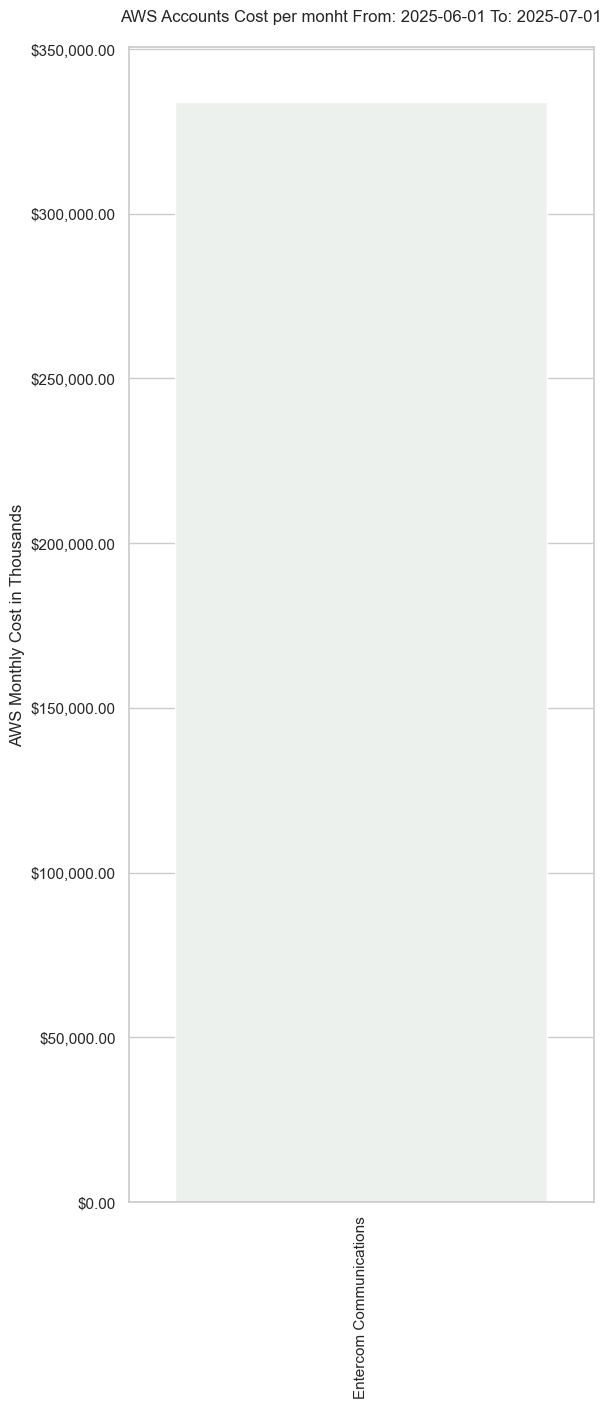

In [26]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
fig, ax = plt.subplots(figsize=(6, 15))

monthly_cost = 1
#sns.set_color_codes("pastel")
sns.barplot(y="Cost", x="Name", data=total_per_account_df,
            palette='light:g', hue='Name', legend=False)


# Add a legend and informative axis label
#ax.legend(ncol=2, loc="lower right", frameon=True)
#ylim=(0, 2500000),
ax.set(xlabel="",
       ylabel="AWS Monthly Cost in Thousands")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')
ax.set_title("AWS Accounts Cost per monht From: " + reportStart + " To: " + reportEnd + '\n')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,.2f}".format(int(x))))
#sns.despine(left=True, bottom=True)

Text(0.5, 1.0, 'Services over $200 per monht on AWS Accounts From: 2025-06-01 To: 2025-07-01\n')

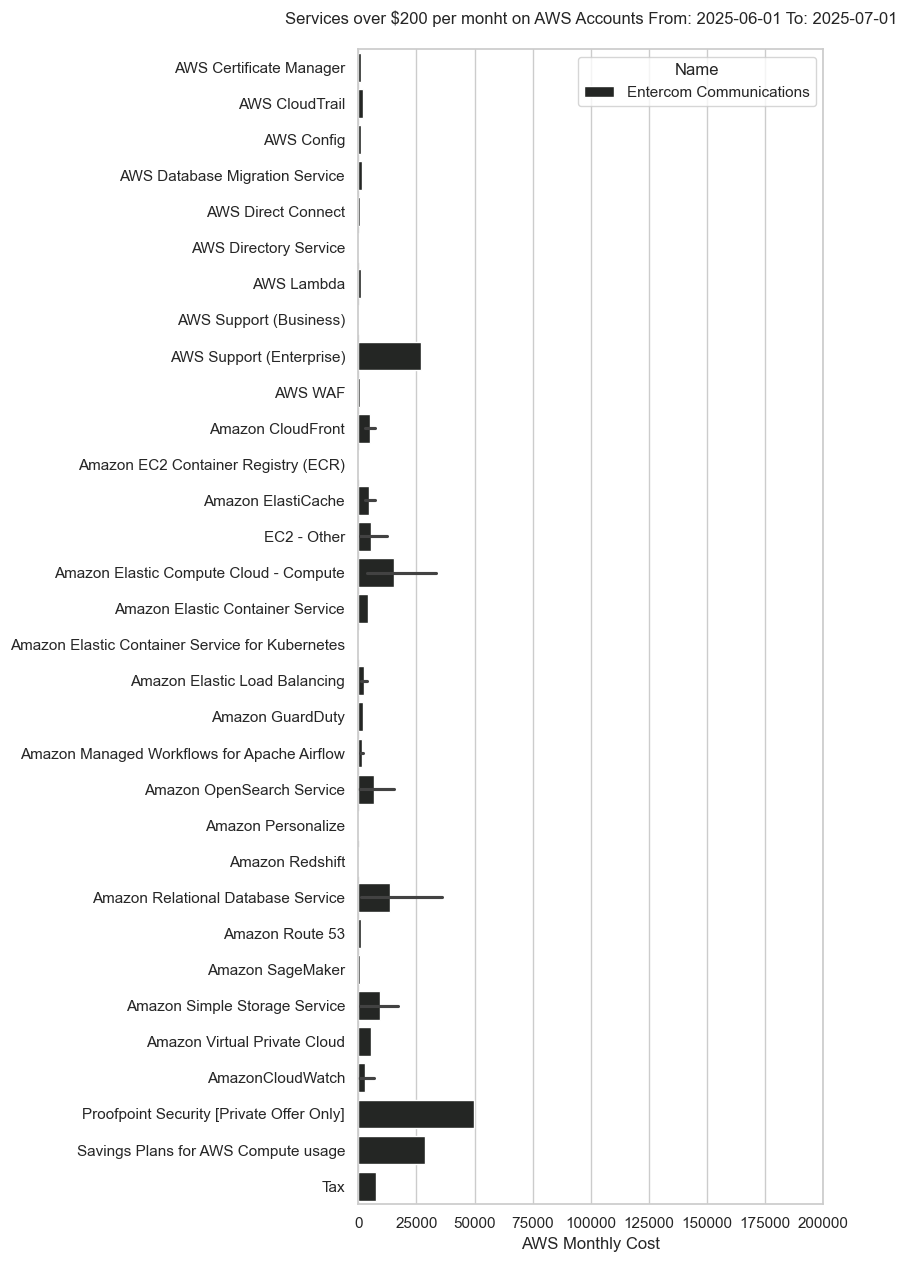

In [27]:

sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
fig, ax = plt.subplots(figsize=(6, 15))

monthly_cost = 200
sns.set_color_codes("pastel")
sns.barplot(x="Cost", y="Service", data=df[df.Cost >= monthly_cost ],
            palette='dark:g', hue='Name')

# Add a legend and informative axis label
#ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 200000), ylabel="",
       xlabel="AWS Monthly Cost")
ax.set_title("Services over $" + str(monthly_cost)+" per monht on AWS Accounts From: " + reportStart + " To: " + reportEnd + '\n')
#sns.despine(left=True, bottom=True)

Text(0.5, 1.0, 'Services over $200 per monht on AWS Accounts From: 2025-06-01 To: 2025-07-01\n')

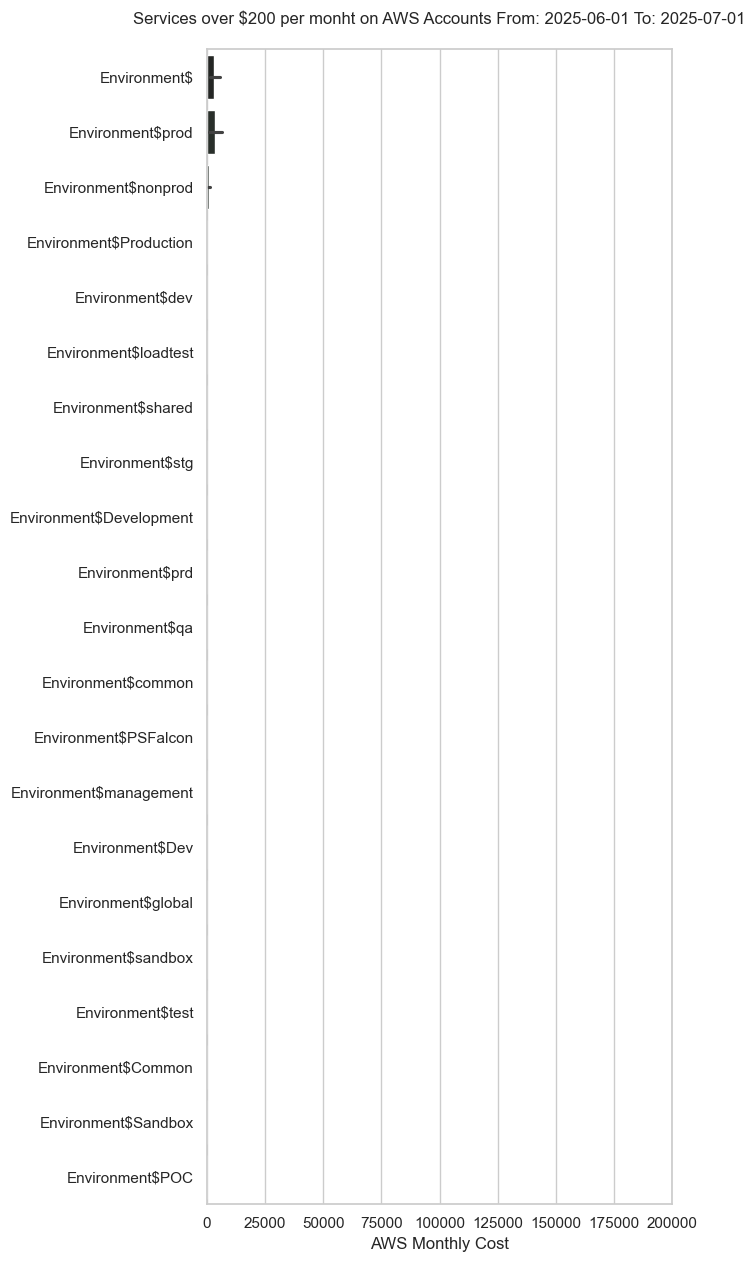

In [28]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
fig, ax = plt.subplots(figsize=(6, 15))

monthly_cost = 200
sns.set_color_codes("pastel")
sns.barplot(x="Cost", y="Enviroment", data=df,
            palette='dark:g', hue='Enviroment')

# Add a legend and informative axis label
#ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 200000), ylabel="",
       xlabel="AWS Monthly Cost")
ax.set_title("Services over $" + str(monthly_cost)+" per monht on AWS Accounts From: " + reportStart + " To: " + reportEnd + '\n')
#sns.despine(left=True, bottom=True)

<Axes: >

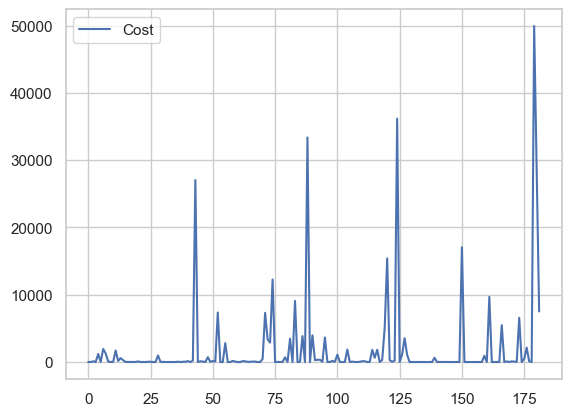

In [29]:
df.plot()

In [32]:
df[df['Cost'] > 30000]

,Month,Year,Name,Account,Service,Cost,Enviroment
88,JUN,2025,Entercom Communications,724972922289,Amazon Elastic Compute Cloud - Compute,33371.502695,Environment$prod
124,JUN,2025,Entercom Communications,724972922289,Amazon Relational Database Service,36158.365522,Environment$
179,JUN,2025,Entercom Communications,724972922289,Proofpoint Security [Private Offer Only],49929.720000,Environment$


In [33]:
df.iloc[175]

Month                             JUN
Year                             2025
Name          Entercom Communications
Account                  724972922289
Service              AmazonCloudWatch
Cost                       455.542404
Enviroment        Environment$nonprod
Name: 175, dtype: object

In [34]:
total_per_service_df = df.groupby(['Year','Service','Name']).agg(Total=('Cost','sum'))

In [35]:
total_per_service_df.head()

Total
Year Service                 Name                                
2025 AWS Amplify             Entercom Communications     0.015715
     AWS Backup              Entercom Communications   105.000643
     AWS Budgets             Entercom Communications     0.340000
     AWS Certificate Manager Entercom Communications  1200.000000
     AWS CloudFormation      Entercom Communications     0.000000

In [36]:
services_df = total_per_service_df[total_per_service_df['Total'] > 0.05000].sort_values(['Name','Total'])

In [37]:
services_df

Total
Year Service                                  Name                                 
2025 AWS Systems Manager                      Entercom Communications      0.077070
     AWS Budgets                              Entercom Communications      0.340000
     Amazon Elastic Transcoder                Entercom Communications      0.634500
     Amazon Inspector                         Entercom Communications      1.200000
     Amazon Macie                             Entercom Communications      1.282320
...                                                                             ...
     Amazon Simple Storage Service            Entercom Communications  27682.658031
     Savings Plans for AWS Compute usage      Entercom Communications  28800.000000
     Amazon Relational Database Service       Entercom Communications  40823.376789
     Amazon Elastic Compute Cloud - Compute   Entercom Communications  46332.314105
     Proofpoint Security [Private Offer Only] Entercom Communications  49929.720000

[69 rows x 1 columns]

/var/folders/bc/rbbb9nc96zd3bj2l2mq3klq00000gp/T/ipykernel_44732/1883216754.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')


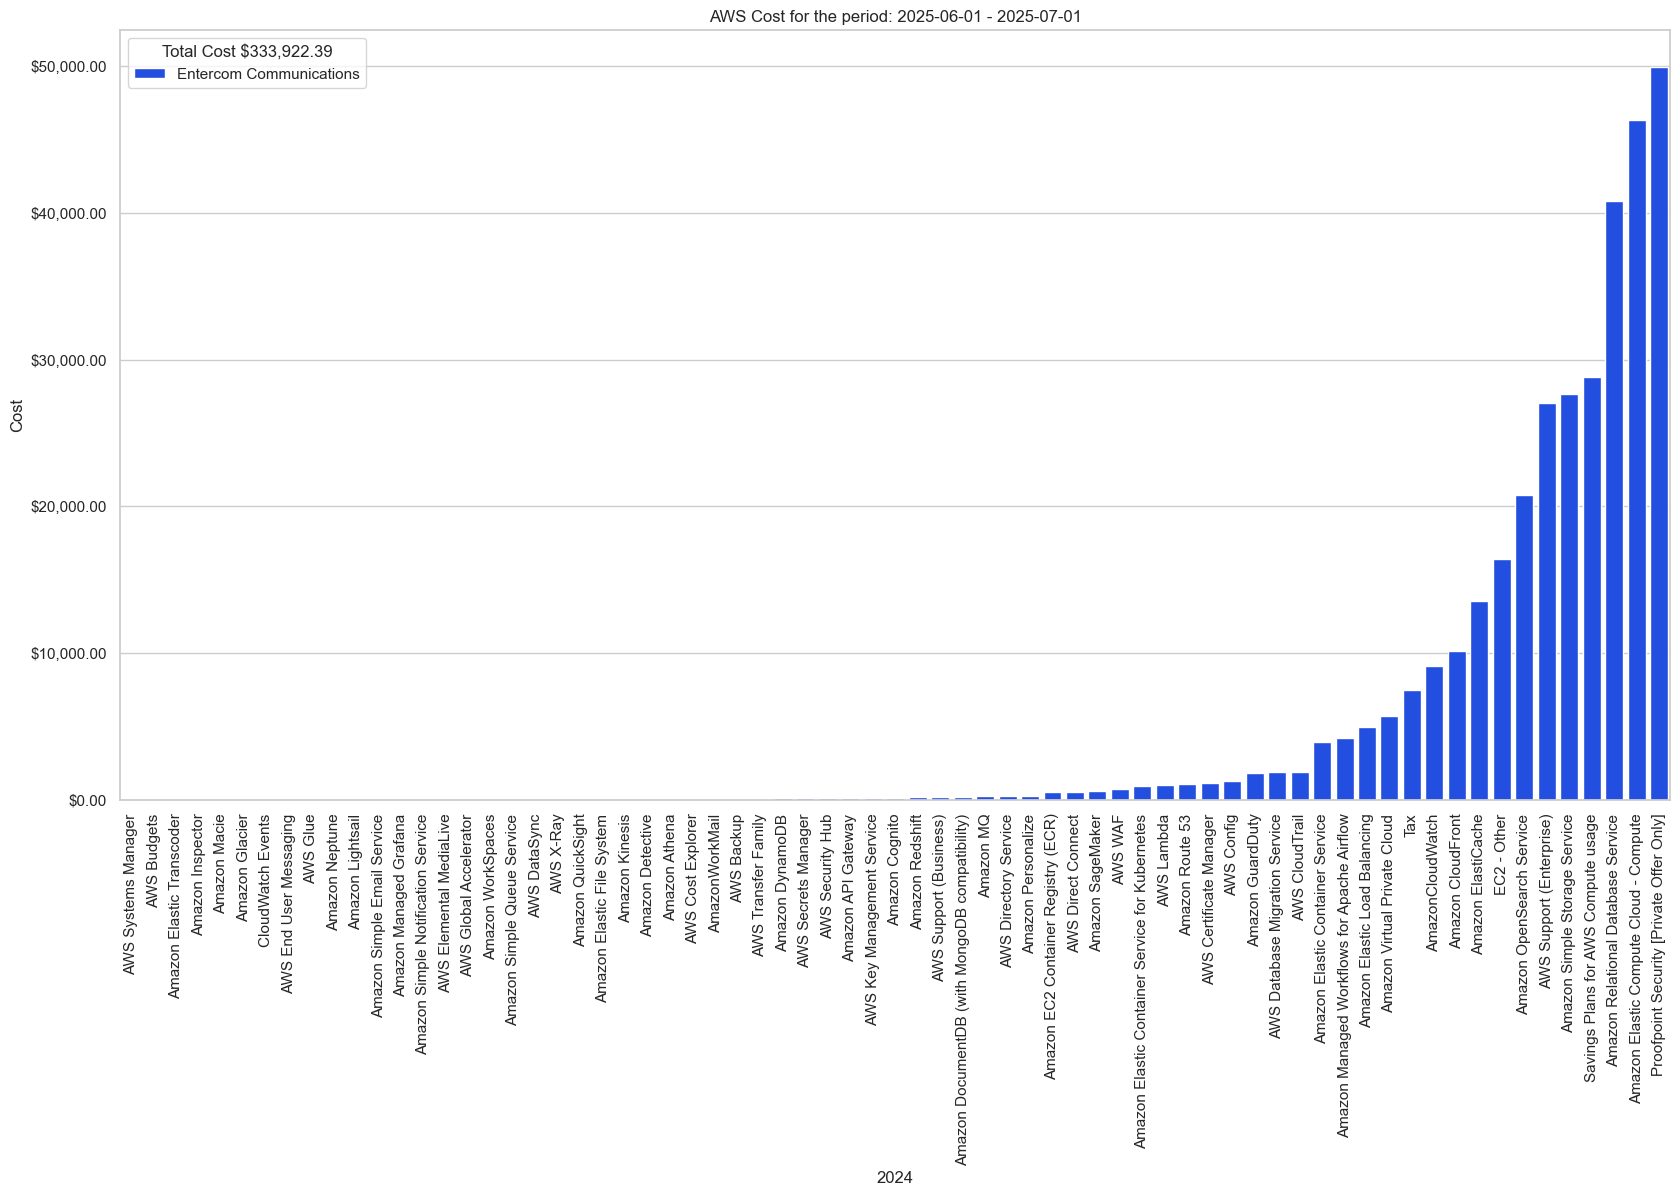

In [38]:
# Initialize the matplotlib figure
fig, ax = plt.subplots(figsize=(20, 10))

sns.barplot(x="Service", y="Total", data=services_df,
            hue='Name', legend=True, color='green',palette='bright')


# Add a legend and informative axis label
#ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set_xlabel("2024")
ax.set_ylabel("Cost")
ax.set_title("AWS Cost for the period: "+ reportStart+" - " + reportEnd)
t = services_df['Total'].sum()
#t = services_df['Total'].sum() - (2 * df_AW['Cost'].sum())
#t_aw = df_AW['Cost'].sum()
# ax.legend(title="Total Cost without AW $"+str("{:,.2f}".format(t))+" --- AW Cost $ "+str("{:,.2f}".format(t_aw)))
ax.legend(title="Total Cost $"+str("{:,.2f}".format(t)))
#ax.set_title("AWS Total Cost for Jun, 2024 by Services over $100,000 \n")
#plt.xticks(rotation=90) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')
#ax.set_xticklabels(labels=services_df['Service'],rotation=45)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,.2f}".format(int(x))))
plt.savefig("AWS Yearly Cost by Service")

In [40]:
total_cost_services = services_df['Total'].sum()
top_5_services_cost = services_df.iloc[-5:]['Total'].sum()
lefover_services_cost = total_cost_services - top_5_services_cost


In [41]:
data = {'labels': ['Top 5 Services Cost', 'All Rest Services Cost'],
        'values': [top_5_services_cost, lefover_services_cost]}
df_pie = pd.DataFrame(data)

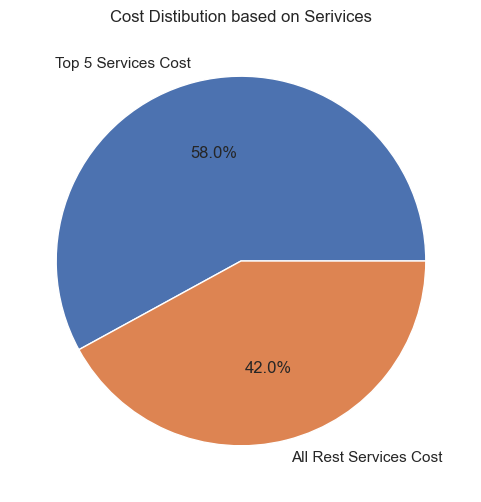

In [42]:

sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(df_pie['values'], labels=df_pie['labels'], autopct='%1.1f%%')
plt.title('Cost Distibution based on Serivices')
plt.show()


# Reading all CSV Files:

In [43]:
import glob

# Get a list of all CSV files in the directory
csv_files = glob.glob('Monthly_Cost_For_*.csv')

# Create an empty list to store the DataFrames
dfs = [] 

# Loop over each CSV file and read it into a DataFrame
for file in csv_files:
    print("reading File: " + file)
    df = pd.read_csv(file) 
    dfs.append(df) 

# Concatenate all the DataFrames into one
combined_df = pd.concat(dfs, axis=0, ignore_index=True) 
month_name = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
month_number = [1,2,3,4,5,6,7,8,9,10,11,12]
kafka_new ='Apache Kafka® & Apache Flink® on Confluent Cloud™ - Annual Commits'
kafka_old ='Apache Kafka® on Confluent Cloud™ - Annual Commits'
combined_df['Month No'] = combined_df['Month'].replace(month_name,month_number)
combined_df['Service'] = combined_df['Service'].replace('Datadog Pro','Datadog')
combined_df['Service'] = combined_df['Service'].replace(kafka_old,kafka_new)
combined_df.to_csv('combined.csv')
# Print the combined DataFrame
combined_df.sample(30)

reading File: Monthly_Cost_For_OCT_2022.csv
reading File: Monthly_Cost_For_OCT_2023.csv
reading File: Monthly_Cost_For_OCT_2021.csv
reading File: Monthly_Cost_For_FEB_2024.csv
reading File: Monthly_Cost_For_JUN_2023.csv
reading File: Monthly_Cost_For_JUN_2022.csv
reading File: Monthly_Cost_For_FEB_2025.csv
reading File: Monthly_Cost_For_OCT_2024.csv
reading File: Monthly_Cost_For_FEB_2022.csv
reading File: Monthly_Cost_For_JUN_2025.csv
reading File: Monthly_Cost_For_JUN_2024.csv
reading File: Monthly_Cost_For_FEB_2023.csv
reading File: Monthly_Cost_For_NOV_2022.csv
reading File: Monthly_Cost_For_NOV_2023.csv
reading File: Monthly_Cost_For_NOV_2021.csv
reading File: Monthly_Cost_For_AUG_2024.csv
reading File: Monthly_Cost_For_JAN_2022.csv
reading File: Monthly_Cost_For_JAN_2023.csv
reading File: Monthly_Cost_For_DEC_2024.csv
reading File: Monthly_Cost_For_NOV_2024.csv
reading File: Monthly_Cost_For_DEC_2021.csv
reading File: Monthly_Cost_For_AUG_2022.csv
reading File: Monthly_Cost_For_D

/var/folders/bc/rbbb9nc96zd3bj2l2mq3klq00000gp/T/ipykernel_44732/3223463694.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  combined_df['Month No'] = combined_df['Month'].replace(month_name,month_number)


,Unnamed: 0,Month,Year,Name,Account,Service,Cost,Enviroment,Month No
4254,200,NOV,2024,Entercom Communications,724972922289,AmazonCloudWatch,18268.882710,NaN,11
1865,154,FEB,2022,Entercom Communications,724972922289,Amazon Relational Database Service,2776.320544,NaN,2
4632,144,AUG,2022,Entercom Communications,724972922289,Amazon Neptune,4.374734,NaN,8
6346,123,MAR,2025,Entercom Communications,724972922289,Amazon OpenSearch Service,29501.709594,Environment$prod,3
4189,135,NOV,2024,Entercom Communications,724972922289,Amazon Managed Streaming for Apache Kafka,181.446720,NaN,11
920,64,JUN,2023,Entercom Communications,724972922289,Amazon EC2 Container Registry (ECR),0.100757,NaN,6
3261,73,AUG,2024,Entercom Communications,724972922289,Amazon EC2 Container Registry (ECR),0.365839,NaN,8
727,85,FEB,2024,Entercom Communications,724972922289,EC2 - Other,18.340923,NaN,2
7054,39,MAY,2025,Entercom Communications,724972922289,AWS Secrets Manager,76.835171,Environment$nonprod,5
9165,208,APR,2022,Entercom Communications,724972922289,AmazonCloudWatch,4.340983,NaN,4


In [44]:
#otal_per_month_df = combined_df.groupby(['Year','Month','Month No']).agg({'Cost':'sum'}).sort_values(by='Month')
total_per_month_df = combined_df.groupby(['Year','Month','Month No']).agg(Total_cost_per_Month=('Cost','sum')).sort_values(by='Month No')
total_per_month_df['Cost_in_Millions'] = total_per_month_df['Total_cost_per_Month']/1000
total_per_month_df 

,,,Total_cost_per_Month,Cost_in_Millions
Year,Month,Month No,,
2022,JAN,1,4.806844e+05,480.684441
2023,JAN,1,6.575551e+05,657.555146
2024,JAN,1,8.108048e+05,810.804834
2025,JAN,1,9.560546e+05,956.054633
2023,FEB,2,6.126164e+05,612.616381
2024,FEB,2,6.158228e+05,615.822808
2025,FEB,2,5.635965e+05,563.596494
2022,FEB,2,4.958688e+05,495.868775
2025,MAR,3,9.737696e+05,973.769641


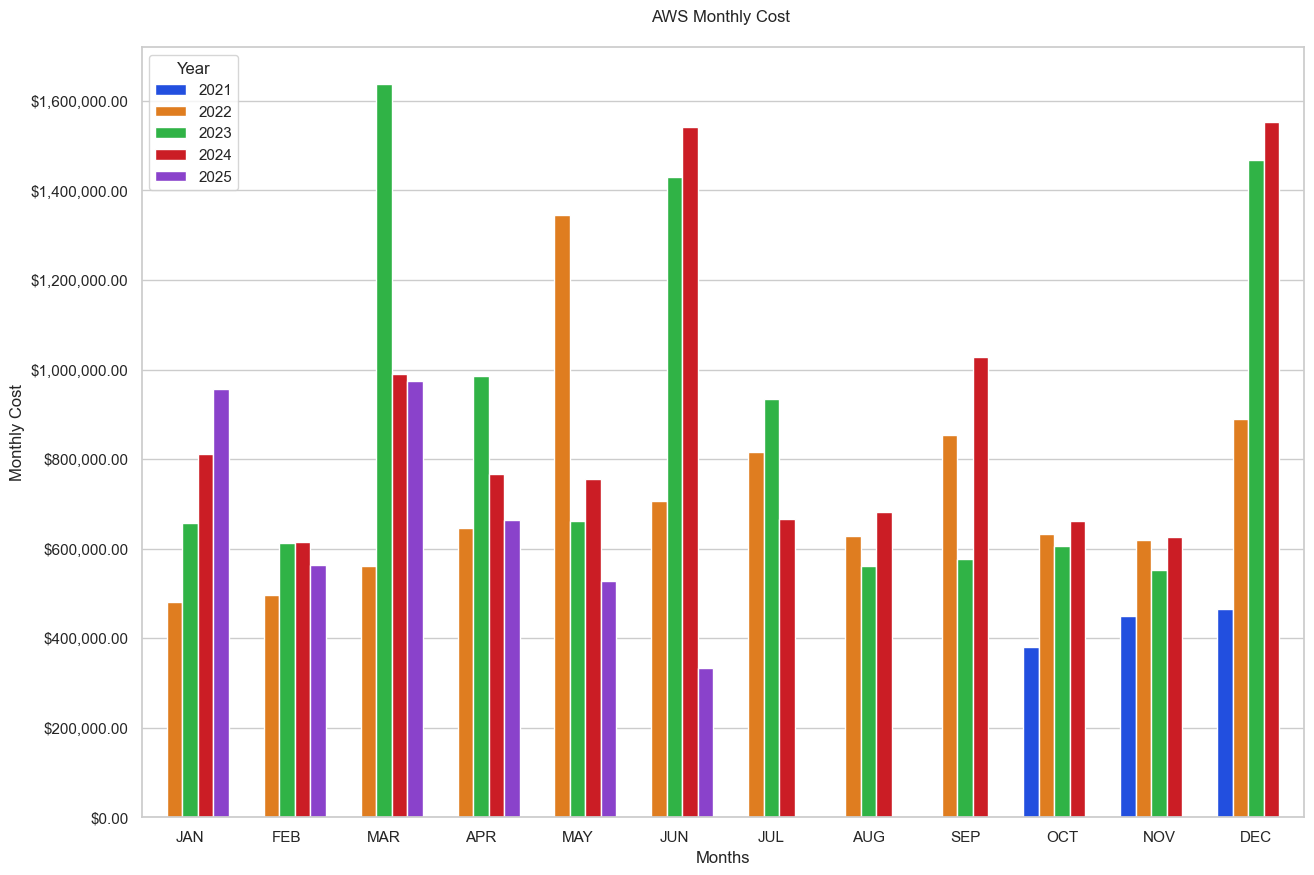

In [45]:

# Initialize the matplotlib figure
#sns.color_palette("viridis", as_cmap=True)
sns.color_palette("bright")
fig, ax = plt.subplots(figsize=(15, 10))

sns.barplot(x="Month", y="Total_cost_per_Month", data=total_per_month_df,
            hue='Year', legend=True, color='green',palette='bright')


# Add a legend and informative axis label
#ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set_xlabel("Months")
ax.set_ylabel("Monthly Cost")
ax.set_title("AWS Monthly Cost \n")
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,.2f}".format(int(x))))
plt.savefig("AWS Monthly Cost")


#sns.despine(left=True, bottom=True)

In [46]:
df_c = combined_df.copy()
#df = combined_df[combined_df['Month No'] == 6]
#df = combined_df[combined_df['Year'] == 2024]

In [47]:
df_c.shape

(9624, 9)

In [48]:
df_c[df_c['Service'] == 'Datadog Pro']

,Unnamed: 0,Month,Year,Name,Account,Service,Cost,Enviroment,Month No


In [49]:
df_c[df_c['Service'] == 'Datadog']

,Unnamed: 0,Month,Year,Name,Account,Service,Cost,Enviroment,Month No
1062,206,JUN,2023,Entercom Communications,724972922289,Datadog,796054.59,NaN,6
2319,206,JUN,2024,Entercom Communications,724972922289,Datadog,494544.00,NaN,6
4050,210,DEC,2024,Entercom Communications,724972922289,Datadog,494544.00,NaN,12
4920,206,DEC,2023,Entercom Communications,724972922289,Datadog,560894.70,NaN,12
5573,219,DEC,2022,Entercom Communications,724972922289,Datadog,235159.90,NaN,12
8289,214,MAR,2023,Entercom Communications,724972922289,Datadog,235159.90,NaN,3
9616,214,SEP,2022,Entercom Communications,724972922289,Datadog,235159.90,NaN,9


In [50]:
#otal_per_month_df = combined_df.groupby(['Year','Month','Month No']).agg({'Cost':'sum'}).sort_values(by='Month')
#total_per_service_df = combined_df[combined_df['Month No'] == 6]
start_year = 2024
total_per_service_df = df_c[df_c['Year'] >= start_year ].groupby(['Year','Service']).agg(Total=('Cost','sum')).sort_values(['Service','Total'])


In [51]:
total_per_service_df.head()

Total
Year Service                 
2024 AWS Amplify     0.013708
2025 AWS Amplify     0.054845
     AWS Backup   1056.440305
2024 AWS Backup   1687.165501
2025 AWS Budgets     3.018000

In [52]:
anual_cost = 10000
services_df = total_per_service_df[total_per_service_df['Total'] > anual_cost].sort_values(['Year','Total'])


In [53]:
services_df

Total
Year Service                                                          
2024 AWS WAF                                              10392.882745
     Amazon MQ                                            13345.617001
     AWS Certificate Manager                              17456.000000
     Amazon Route 53                                      18201.454729
     Amazon Redshift                                      20560.851526
...                                                                ...
2025 Apache Kafka® & Apache Flink® on Confluent Clou...  281494.330000
     Savings Plans for AWS Compute usage                 284266.200000
     Amazon Simple Storage Service                       316679.291731
     Amazon Relational Database Service                  479738.658109
     Amazon Elastic Compute Cloud - Compute              554506.098967

[64 rows x 1 columns]

In [54]:
combined_df[combined_df['Service'] == 'Red Canary Managed Detection and Response']

,Unnamed: 0,Month,Year,Name,Account,Service,Cost,Enviroment,Month No
5137,210,JAN,2024,Entercom Communications,724972922289,Red Canary Managed Detection and Response,227217.6,NaN,1
5350,208,JAN,2025,Entercom Communications,724972922289,Red Canary Managed Detection and Response,234144.0,Environment$,1


/var/folders/bc/rbbb9nc96zd3bj2l2mq3klq00000gp/T/ipykernel_44732/1879410909.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')


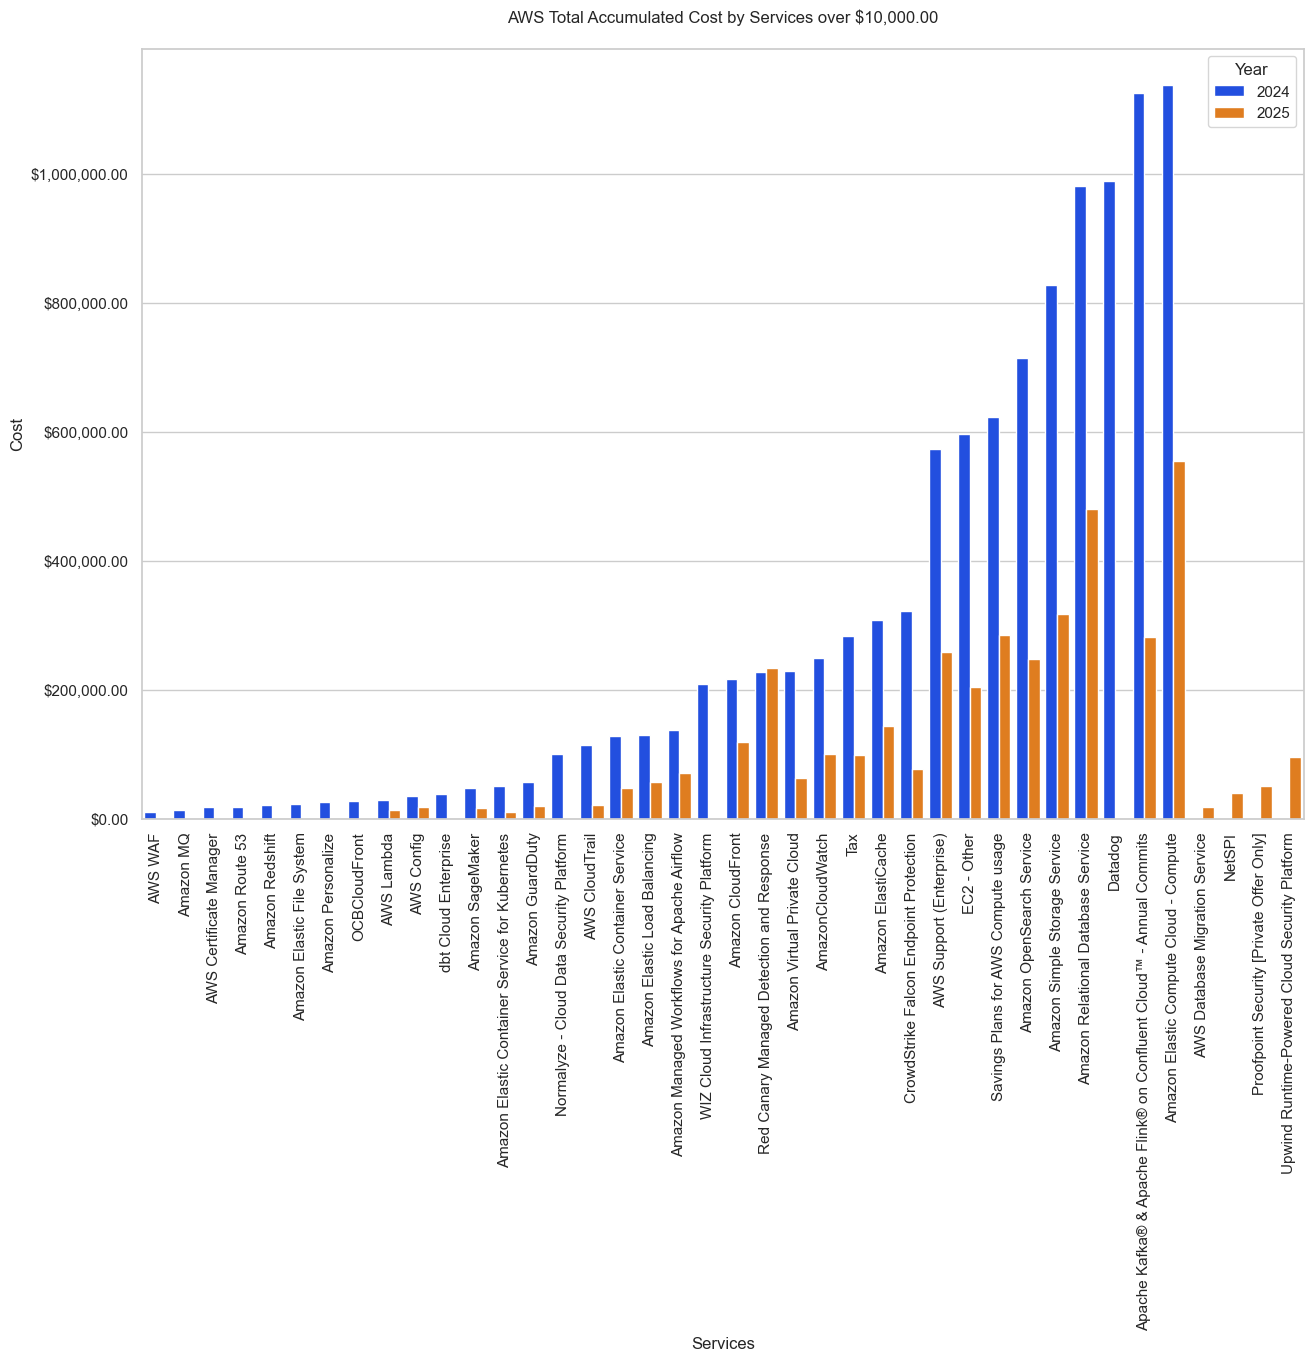

In [55]:
# Initialize the matplotlib figure
fig, ax = plt.subplots(figsize=(15, 10))

sns.barplot(x="Service", y="Total", data=services_df,
            hue='Year', legend=True, color='green',palette='bright')


# Add a legend and informative axis label
#ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set_xlabel("Services")
ax.set_ylabel("Cost")
ax.set_title("AWS Total Accumulated Cost by Services over " + "${:,.2f}".format(int(anual_cost)) + "\n")
#ax.set_title("AWS Total Cost for Jun, 2024 by Services over $10,000 \n")
#plt.xticks(rotation=90) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')
#ax.set_xticklabels(labels=services_df['Service'],rotation=45)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,.2f}".format(int(x))))
plt.savefig("AWS Yearly Cost by Service")

In [107]:
total_per_account_df = combined_df.groupby(['Year','Name']).agg(Total=('Cost','sum'))

In [108]:
total_per_account_df

,,Total
Year,Name,
2021,Entercom Communications,1.294031e+06
2022,Entercom Communications,8.677296e+06
2023,Entercom Communications,1.068157e+07
2024,Entercom Communications,1.069632e+07
2025,Entercom Communications,3.686084e+06


/var/folders/bc/rbbb9nc96zd3bj2l2mq3klq00000gp/T/ipykernel_14895/4280847152.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')


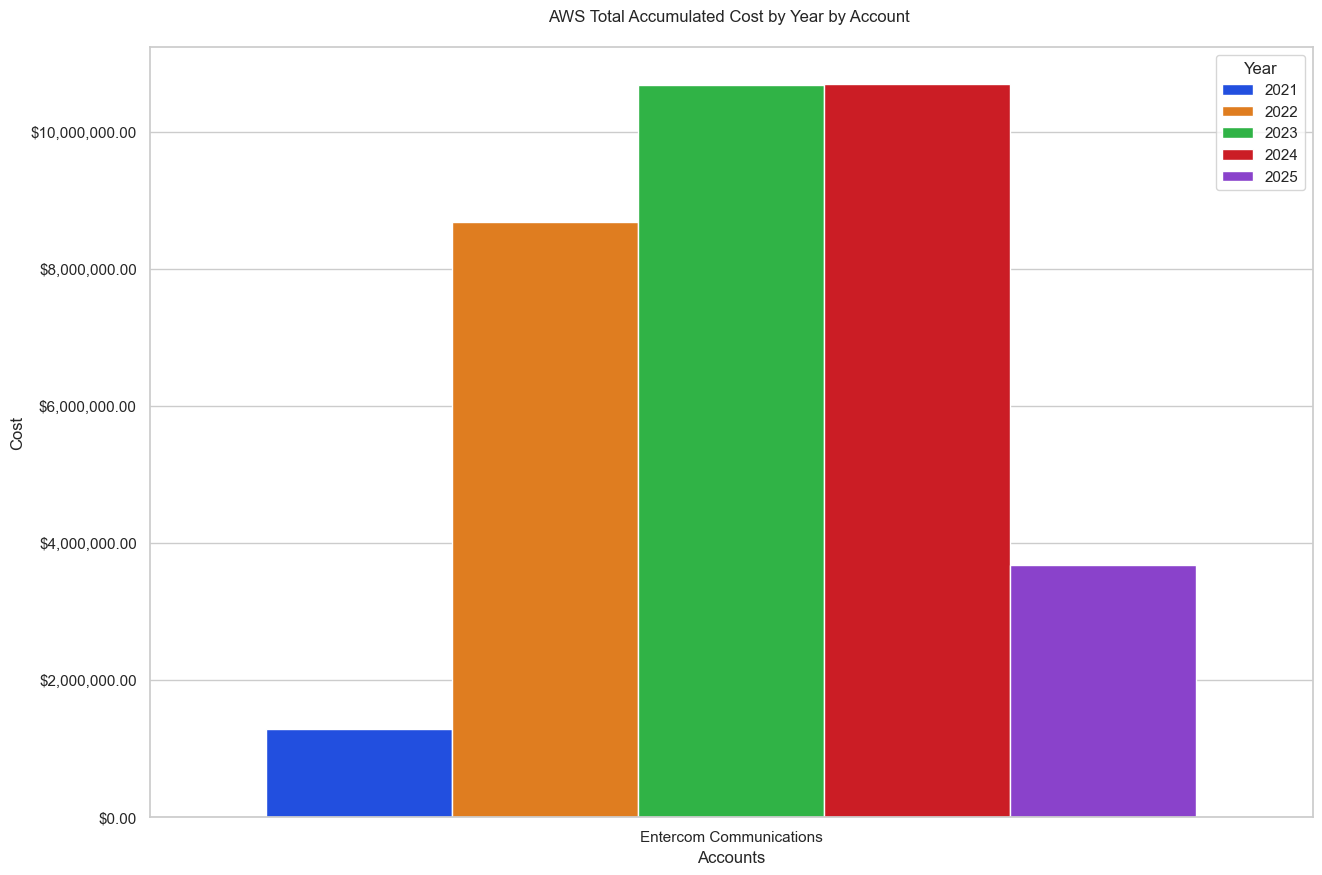

In [109]:
# Initialize the matplotlib figure
fig, ax = plt.subplots(figsize=(15, 10))

sns.barplot(x="Name", y="Total", data=total_per_account_df,
            hue='Year', legend=True, color='green',palette='bright')


# Add a legend and informative axis label
#ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set_xlabel("Accounts")
ax.set_ylabel("Cost")
ax.set_title("AWS Total Accumulated Cost by Year by Account \n")
#plt.xticks(rotation=90) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')
#ax.set_xticklabels(labels=services_df['Service'],rotation=45)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,.2f}".format(int(x))))
plt.savefig("AWS Yearly Cost")

# Time Series Exploration 

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seasonal
%matplotlib inline

In [54]:
combined_df.sample(10)

,Unnamed: 0,Month,Year,Name,Account,Service,Cost,Enviroment,Month No
4826,81,JAN,2024,Entercom Communications,724972922289,Amazon ElastiCache,517.109760,NaN,1
4126,38,DEC,2021,Entercom Communications,724972922289,AWS Step Functions,0.000822,NaN,12
4023,151,NOV,2024,Entercom Communications,724972922289,Amazon Relational Database Service,566.722251,NaN,11
4105,17,DEC,2021,Entercom Communications,724972922289,AWS Key Management Service,34.561598,NaN,12
4514,208,AUG,2022,Entercom Communications,724972922289,AmazonCloudWatch,77.126814,NaN,8
1009,153,JUN,2023,Entercom Communications,724972922289,Amazon Route 53,0.005408,NaN,6
9145,149,MAY,2023,Entercom Communications,724972922289,Amazon OpenSearch Service,12990.279604,NaN,5
2764,188,NOV,2023,Entercom Communications,724972922289,Amazon Simple Storage Service,0.011723,NaN,11
1258,191,JUN,2022,Entercom Communications,724972922289,Amazon Simple Storage Service,1047.946153,NaN,6
2869,78,NOV,2021,Entercom Communications,724972922289,EC2 - Other,87.966014,NaN,11


In [55]:
df1 =combined_df.copy()
df1['Date_str'] = df1['Year'].apply(lambda x: str(x)) + "-" + df1['Month No'].apply(lambda x: str(x)) + "-01"
df1['Date'] = pd.to_datetime(df1['Date_str'])
df1 = df1.groupby(by=['Date']).agg({'Cost':sum})
df1.sort_index(inplace=True)
df1 = df1.resample('MS').sum()
df1['Cost'].sum()

/var/folders/bc/rbbb9nc96zd3bj2l2mq3klq00000gp/T/ipykernel_14895/1614081839.py:4: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df1 = df1.groupby(by=['Date']).agg({'Cost':sum})


np.float64(34961839.2522222)

[Text(0, 0.5, 'Total Monthly Cost')]

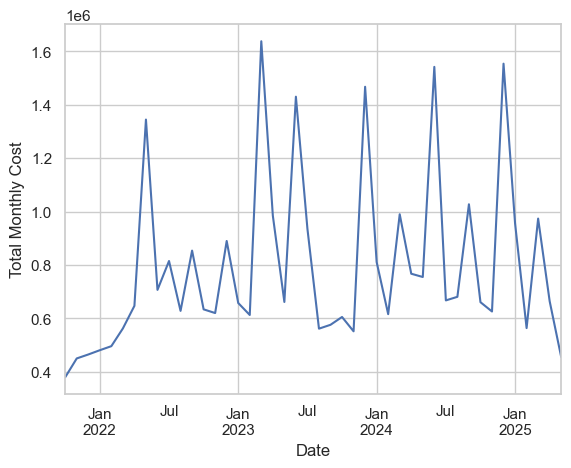

In [56]:
ax = df1['Cost'].plot()
ax.autoscale(axis='x', tight=True)
ax.set(ylabel='Total Monthly Cost')

In [57]:
def seasonal_period_udf(counts):
    seasons, trend = seasonal.fit_seasons(counts, trend="spline")
    if (seasons is not None): 
        return len(seasons)
    else: 
        return -1

In [58]:
seasonal_period_udf(df1['Cost'].values)

6

# Trend calculation
We can use functionalitis of statsmodels to get the trend value from a time series data.
Here we can use statsmodels.tsa.filters.hp_filter.hpfilter(X, lamb=1600) the Hodrick Prescott filter. It filter out time series
yt τt ct

In [57]:
from statsmodels.tsa.filters.hp_filter import hpfilter
#get the values
cost_cycle, cost_trend = hpfilter(df1['Cost'], lamb=1600) # 1600 for Quarterly data, 6.25  for yerly data and 129600 for monthly data

In [87]:
cost_cycle

Date
2021-10-01   -116455.636210
2021-11-01    -74076.422384
2021-12-01    -87329.362128
2022-01-01    -99160.381594
2022-02-01   -111442.847608
2022-03-01    -71946.327424
2022-04-01    -13286.401420
2022-05-01    659782.684328
2022-06-01     -1255.878910
2022-07-01     85443.277789
2022-08-01   -121459.882796
2022-09-01     85777.446141
2022-10-01   -151555.604041
2022-11-01   -181400.864607
2022-12-01     74005.915333
2023-01-01   -171623.562476
2023-02-01   -228298.884789
2023-03-01    787010.605847
2023-04-01    125945.032583
2023-05-01   -203790.964108
2023-06-01    560529.315859
2023-07-01     62319.207519
2023-08-01   -313520.775097
2023-09-01   -300588.470370
2023-10-01   -272646.345422
2023-11-01   -327604.560426
2023-12-01    587279.113471
2024-01-01    -70138.136233
2024-02-01   -265563.620762
2024-03-01    108293.691364
2024-04-01   -114333.228189
2024-05-01   -126210.736361
2024-06-01    661729.858920
2024-07-01   -211559.330729
2024-08-01   -196243.131063
2024-09-01    1

In [58]:
type(cost_cycle)

pandas.core.series.Series

In [59]:
cost_trend

Date
2021-10-01    496327.355935
2021-11-01    524284.561471
2021-12-01    552168.709709
2022-01-01    579860.260418
2022-02-01    607184.994881
2022-03-01    633906.709496
2022-04-01    659719.628021
2022-05-01    684273.176850
2022-06-01    707208.738873
2022-07-01    728580.414719
2022-08-01    748441.968415
2022-09-01    766901.110624
2022-10-01    783990.281477
2022-11-01    799796.271448
2022-12-01    814311.984769
2023-01-01    827417.880068
2023-02-01    839041.688701
2023-03-01    849004.977819
2023-04-01    856987.798752
2023-05-01    863163.310798
2023-06-01    867784.650642
2023-07-01    870978.857224
2023-08-01    873224.549844
2023-09-01    875040.485673
2023-10-01    876750.551524
2023-11-01    878491.682524
2023-12-01    880231.096784
2024-01-01    881731.642241
2024-02-01    883123.209210
2024-03-01    884491.358751
2024-04-01    885754.589175
2024-05-01    886897.287267
2024-06-01    887829.750220
2024-07-01    888379.790784
2024-08-01    888784.086713
2024-09-01    8

In [60]:
df1['Trend'] = cost_trend

In [61]:
df1.sample(10)

,Cost,Trend
Date,,
2021-10-01,3.794357e+05,496327.355935
2022-02-01,4.958688e+05,607184.994881
2022-07-01,8.148950e+05,728580.414719
2024-07-01,6.672585e+05,888379.790784
2023-04-01,9.849516e+05,856987.798752
2023-11-01,5.514994e+05,878491.682524
2023-06-01,1.430313e+06,867784.650642
2024-11-01,6.257406e+05,889673.488456
2021-12-01,4.646831e+05,552168.709709


# Plot the trend

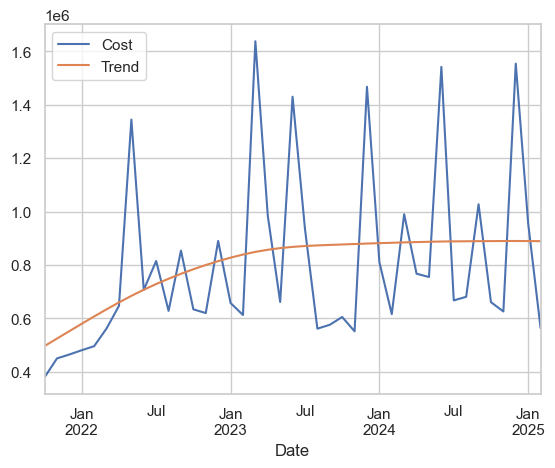

In [62]:
df1[['Cost', 'Trend']].plot().autoscale(axis='x', tight=True)

# Plot the cyclic values

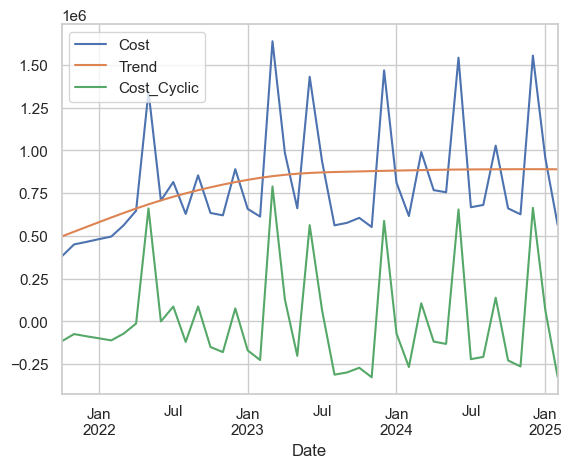

In [63]:
df1['Cost_Cyclic'] = cost_cycle
df1[['Cost', 'Trend', 'Cost_Cyclic']].plot().autoscale(axis='x', tight=True)

# Time Series Stationarity

A time series is stationary if the mean and variance are fixed between two equidistance points. That is, no matter where you take your
observations, the result should be same. A series that shows seasonality is not stationary.
How to test if a series is stationary?
A test for stationarity usually involves a unit root hypothesis test, where the null hypothesis H0
is that the series is nonstationary, and contains
a unit root. The alternate hypothesis H1
supports stationarity. The augmented Dickey-Fuller and Kwiatkowski-Phillips-Schmidt-Shin tests are
stationarity tests.

In [64]:
from statsmodels.tsa.stattools import adfuller,kpss,coint,bds,q_stat,grangercausalitytests,levinson_durbin

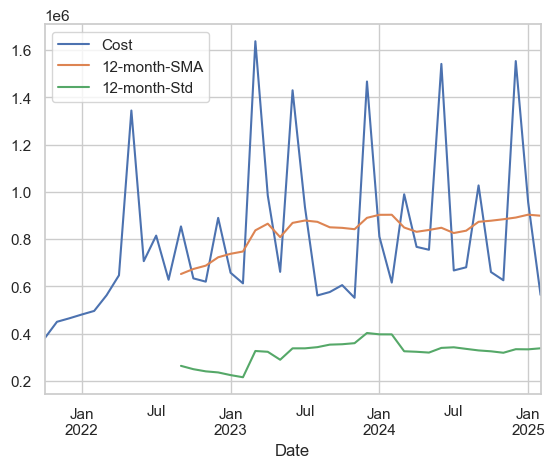

In [65]:
df1['12-month-SMA'] = df1['Cost'].rolling(window=12).mean()
df1['12-month-Std'] = df1['Cost'].rolling(window=12).std()
df1[['Cost','12-month-SMA','12-month-Std']].plot();

In [66]:
print('Augmented Dickey-Fuller Test on Cost Data')
dftest = adfuller(df1['Cost'],autolag='AIC')
dftest

Augmented Dickey-Fuller Test on Cost Data


(np.float64(-3.491695779122095),
 np.float64(0.008202942915647278),
 6,
 34,
 {'1%': np.float64(-3.639224104416853),
  '5%': np.float64(-2.9512301791166293),
  '10%': np.float64(-2.614446989619377)},
 np.float64(844.1626332525345))

In [67]:
print('Augmented Dickey-Fuller Test on Cost Data')
dfout = pd.Series(dftest[0:4],index=['ADF test statistic','p-value','# lags used','# observations'])
for key,val in dftest[4].items():
    dfout[f'critical value ({key})']=val
print(dfout)

Augmented Dickey-Fuller Test on Cost Data
ADF test statistic      -3.491696
p-value                  0.008203
# lags used              6.000000
# observations          34.000000
critical value (1%)     -3.639224
critical value (5%)     -2.951230
critical value (10%)    -2.614447
dtype: float64


# We reject the Null Hypothesis (H0) so the Data is Stationary 

In [68]:
df1

,Cost,Trend,Cost_Cyclic,12-month-SMA,12-month-Std
Date,,,,,
2021-10-01,3.794357e+05,496327.355935,-116891.678890,NaN,NaN
2021-11-01,4.499119e+05,524284.561471,-74372.688420,NaN,NaN
2021-12-01,4.646831e+05,552168.709709,-87485.578992,NaN,NaN
2022-01-01,4.806844e+05,579860.260418,-99175.819067,NaN,NaN
2022-02-01,4.958688e+05,607184.994881,-111316.220142,NaN,NaN
2022-03-01,5.622309e+05,633906.709496,-71675.784494,NaN,NaN
2022-04-01,6.468500e+05,659719.628021,-12869.606666,NaN,NaN
2022-05-01,1.344622e+06,684273.176850,660348.384011,NaN,NaN
2022-06-01,7.066702e+05,707208.738873,-538.564945,NaN,NaN


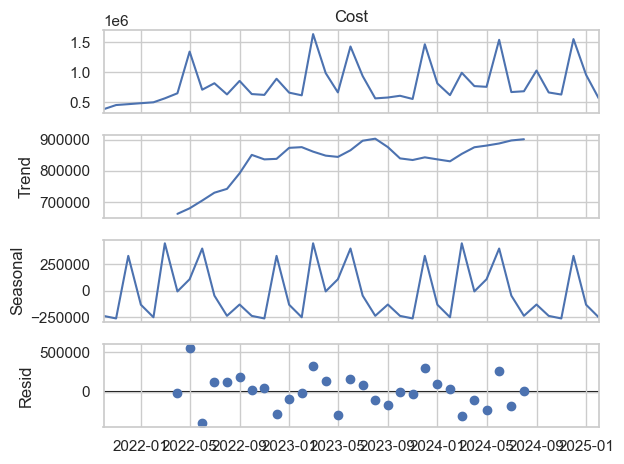

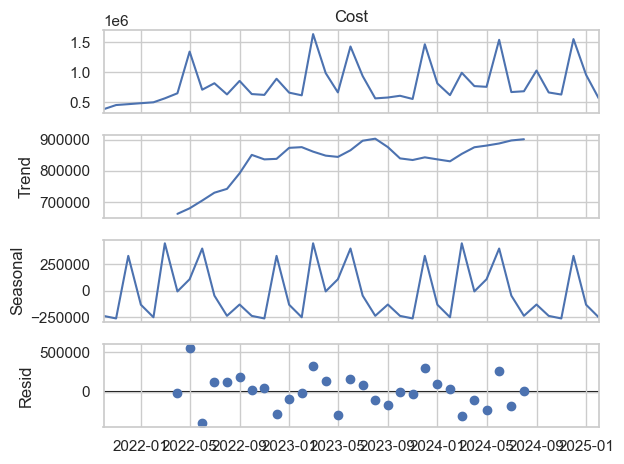

In [69]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df1['Cost'], model='additive')
result.plot()

# Moving average and Exponentially moving avearge

# Simple Moving Average(SMA)

In [70]:
df1['3-month-SMA'] = df1['Cost'].rolling(window=3).mean()
df1['6-month-SMA'] = df1['Cost'].rolling(window=6).mean()
df1.head(10)

,Cost,Trend,Cost_Cyclic,12-month-SMA,12-month-Std,3-month-SMA,6-month-SMA
Date,,,,,,,
2021-10-01,3.794357e+05,496327.355935,-116891.678890,NaN,NaN,NaN,NaN
2021-11-01,4.499119e+05,524284.561471,-74372.688420,NaN,NaN,NaN,NaN
2021-12-01,4.646831e+05,552168.709709,-87485.578992,NaN,NaN,431343.560271,NaN
2022-01-01,4.806844e+05,579860.260418,-99175.819067,NaN,NaN,465093.148373,NaN
2022-02-01,4.958688e+05,607184.994881,-111316.220142,NaN,NaN,480412.115602,NaN
2022-03-01,5.622309e+05,633906.709496,-71675.784494,NaN,NaN,512928.047031,472135.803651
2022-04-01,6.468500e+05,659719.628021,-12869.606666,NaN,NaN,568316.573698,516704.861036
2022-05-01,1.344622e+06,684273.176850,660348.384011,NaN,NaN,851234.169072,665823.142337
2022-06-01,7.066702e+05,707208.738873,-538.564945,NaN,NaN,899380.585381,706154.316206


<Axes: xlabel='Date'>

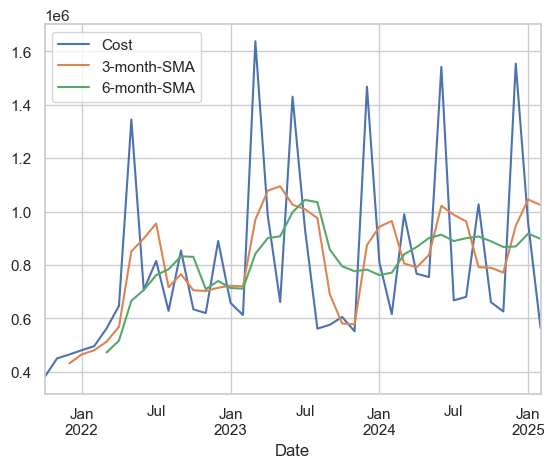

In [71]:
df1[['Cost','3-month-SMA','6-month-SMA']].plot()

# Exponentially weighted moving avearge(EWMA)
It allows to reduce the lag effect from SMA and it will put more weight on values that occured more recently. It does apply more weight on
values that occured more recently. The amount of weight applied to the most recent values will depend on actual parameters used in EWMA
and the number of periods given a window size.

In [72]:
#append ewma for span of three months
df1['3-span-EWMA'] = df1['Cost'].ewm(span=12, adjust=False).mean()

<Axes: xlabel='Date'>

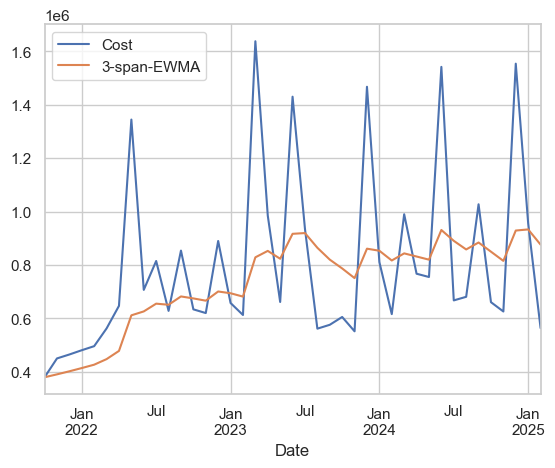

In [73]:
df1[['Cost','3-span-EWMA']].plot()

<Axes: xlabel='Date'>

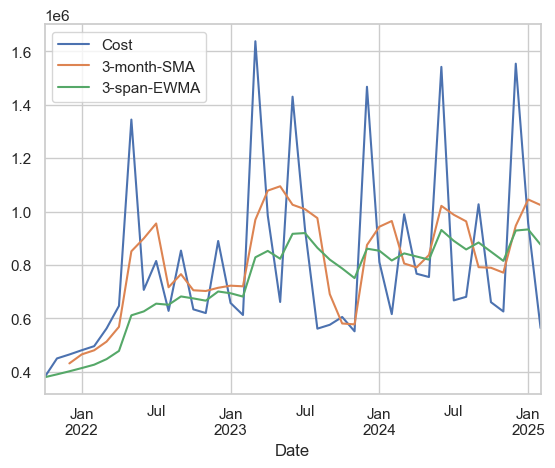

In [74]:
df1[['Cost','3-month-SMA','3-span-EWMA']].plot()

# Simple Exponential Smoothing

In [75]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
span = 3
#define alpha#
alpha = 2/(span+1)
#exponentially weightage moving average using pandas
df1['EWMA3'] = df1['Cost'].ewm(alpha=alpha, adjust=False).mean()
#Simple exponential smoothing
df1['SES3'] = SimpleExpSmoothing(df1['Cost']).fit(smoothing_level=alpha,optimized=False).fittedvalues.shift(-1)
df1.head()

,Cost,Trend,Cost_Cyclic,12-month-SMA,12-month-Std,3-month-SMA,6-month-SMA,3-span-EWMA,EWMA3,SES3
Date,,,,,,,,,,
2021-10-01,379435.677044,496327.355935,-116891.678890,NaN,NaN,NaN,NaN,379435.677044,379435.677044,379435.677044
2021-11-01,449911.873052,524284.561471,-74372.688420,NaN,NaN,NaN,NaN,390278.168738,414673.775048,414673.775048
2021-12-01,464683.130717,552168.709709,-87485.578992,NaN,NaN,431343.560271,NaN,401725.085965,439678.452882,439678.452882
2022-01-01,480684.441351,579860.260418,-99175.819067,NaN,NaN,465093.148373,NaN,413872.679101,460181.447117,460181.447117
2022-02-01,495868.774739,607184.994881,-111316.220142,NaN,NaN,480412.115602,NaN,426487.463046,478025.110928,478025.110928


In [76]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
df1['DESAdd'] = ExponentialSmoothing(df1['Cost'], trend='add').fit().fittedvalues.shift(-1)
df1.head(5)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


,Cost,Trend,Cost_Cyclic,12-month-SMA,12-month-Std,3-month-SMA,6-month-SMA,3-span-EWMA,EWMA3,SES3,DESAdd
Date,,,,,,,,,,,
2021-10-01,379435.677044,496327.355935,-116891.678890,NaN,NaN,NaN,NaN,379435.677044,379435.677044,379435.677044,415208.937047
2021-11-01,449911.873052,524284.561471,-74372.688420,NaN,NaN,NaN,NaN,390278.168738,414673.775048,414673.775048,487889.388711
2021-12-01,464683.130717,552168.709709,-87485.578992,NaN,NaN,431343.560271,NaN,401725.085965,439678.452882,439678.452882,550054.616539
2022-01-01,480684.441351,579860.260418,-99175.819067,NaN,NaN,465093.148373,NaN,413872.679101,460181.447117,460181.447117,602367.180381
2022-02-01,495868.774739,607184.994881,-111316.220142,NaN,NaN,480412.115602,NaN,426487.463046,478025.110928,478025.110928,645290.141123


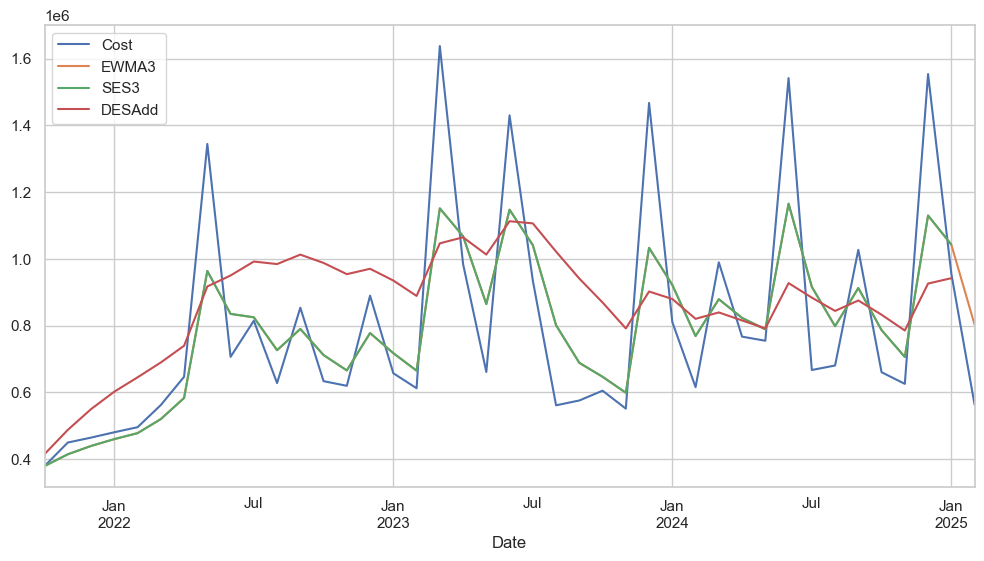

In [77]:
df1[['Cost', 'EWMA3', 'SES3', 'DESAdd']].plot(figsize=(12, 6)).autoscale(axis='x', tight=True)

In [78]:
df1['DESMul'] = ExponentialSmoothing(df1['Cost'], trend='mul').fit().fittedvalues.shift(-1)
df1.head(5)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


,Cost,Trend,Cost_Cyclic,12-month-SMA,12-month-Std,3-month-SMA,6-month-SMA,3-span-EWMA,EWMA3,SES3,DESAdd,DESMul
Date,,,,,,,,,,,,
2021-10-01,379435.677044,496327.355935,-116891.678890,NaN,NaN,NaN,NaN,379435.677044,379435.677044,379435.677044,415208.937047,439690.085685
2021-11-01,449911.873052,524284.561471,-74372.688420,NaN,NaN,NaN,NaN,390278.168738,414673.775048,414673.775048,487889.388711,551316.736545
2021-12-01,464683.130717,552168.709709,-87485.578992,NaN,NaN,431343.560271,NaN,401725.085965,439678.452882,439678.452882,550054.616539,647089.139053
2022-01-01,480684.441351,579860.260418,-99175.819067,NaN,NaN,465093.148373,NaN,413872.679101,460181.447117,460181.447117,602367.180381,720899.930896
2022-02-01,495868.774739,607184.994881,-111316.220142,NaN,NaN,480412.115602,NaN,426487.463046,478025.110928,478025.110928,645290.141123,768981.429329


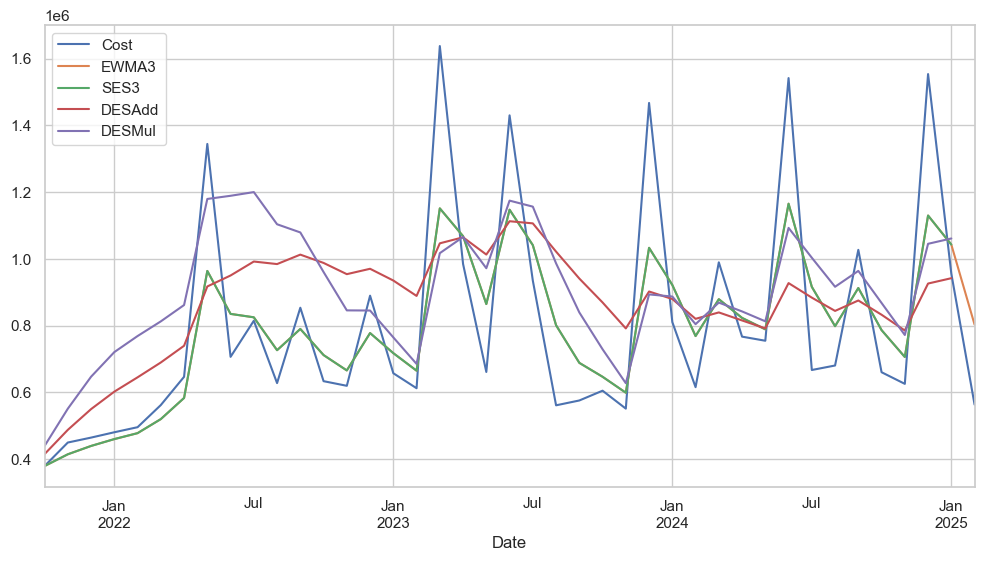

In [79]:
df1[['Cost', 'EWMA3', 'SES3', 'DESAdd', 'DESMul']].plot(figsize=(12, 6)).autoscale(axis='x', tight=True)

In [80]:
df1['TESAdd'] = ExponentialSmoothing(df1['Cost'], trend='add', seasonal='add', seasonal_periods=12).fit().fittedvalues
df1.head(5)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


,Cost,Trend,Cost_Cyclic,12-month-SMA,12-month-Std,3-month-SMA,6-month-SMA,3-span-EWMA,EWMA3,SES3,DESAdd,DESMul,TESAdd
Date,,,,,,,,,,,,,
2021-10-01,379435.677044,496327.355935,-116891.678890,NaN,NaN,NaN,NaN,379435.677044,379435.677044,379435.677044,415208.937047,439690.085685,4.130417e+05
2021-11-01,449911.873052,524284.561471,-74372.688420,NaN,NaN,NaN,NaN,390278.168738,414673.775048,414673.775048,487889.388711,551316.736545,4.096124e+05
2021-12-01,464683.130717,552168.709709,-87485.578992,NaN,NaN,431343.560271,NaN,401725.085965,439678.452882,439678.452882,550054.616539,647089.139053,1.026767e+06
2022-01-01,480684.441351,579860.260418,-99175.819067,NaN,NaN,465093.148373,NaN,413872.679101,460181.447117,460181.447117,602367.180381,720899.930896,5.240646e+05
2022-02-01,495868.774739,607184.994881,-111316.220142,NaN,NaN,480412.115602,NaN,426487.463046,478025.110928,478025.110928,645290.141123,768981.429329,4.193876e+05


<Axes: xlabel='Date'>

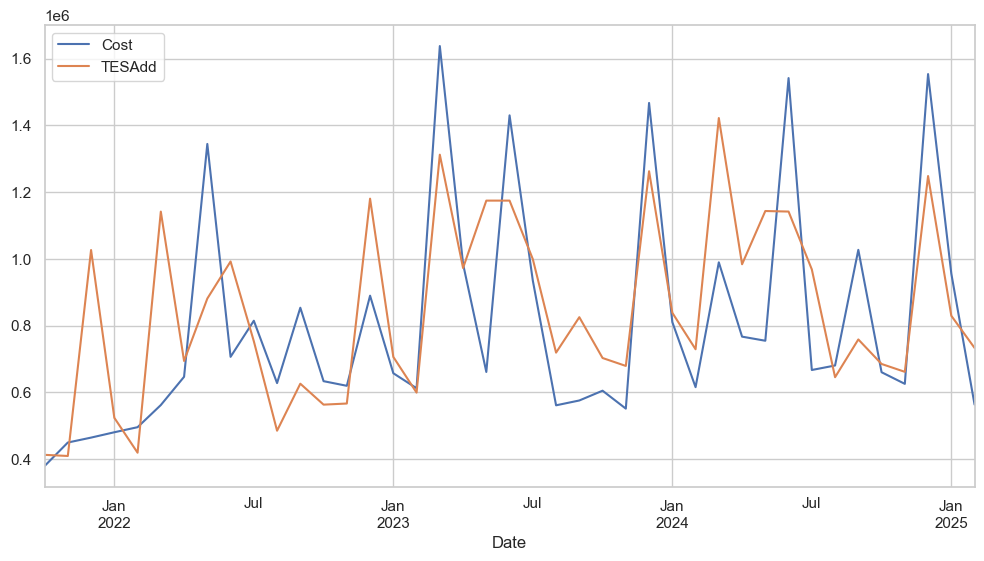

In [81]:
df1[['Cost', 'TESAdd']].plot(figsize=(12, 6))

In [82]:
df1['TESMul'] = ExponentialSmoothing(df1['Cost'], trend='add', seasonal='mul', seasonal_periods=12).fit().fittedvalues
df.head(5)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


,Unnamed: 0,Month,Year,Name,Account,Service,Cost
0,0,SEP,2022,Entercom Communications,724972922289,AWS Backup,2.858410e+00
1,1,SEP,2022,Entercom Communications,724972922289,AWS Backup,1.200000e-08
2,2,SEP,2022,Entercom Communications,724972922289,AWS Backup,4.750796e+02
3,3,SEP,2022,Entercom Communications,724972922289,AWS Certificate Manager,1.810000e+03
4,4,SEP,2022,Entercom Communications,724972922289,AWS Certificate Manager,3.620000e+02


<Axes: xlabel='Date'>

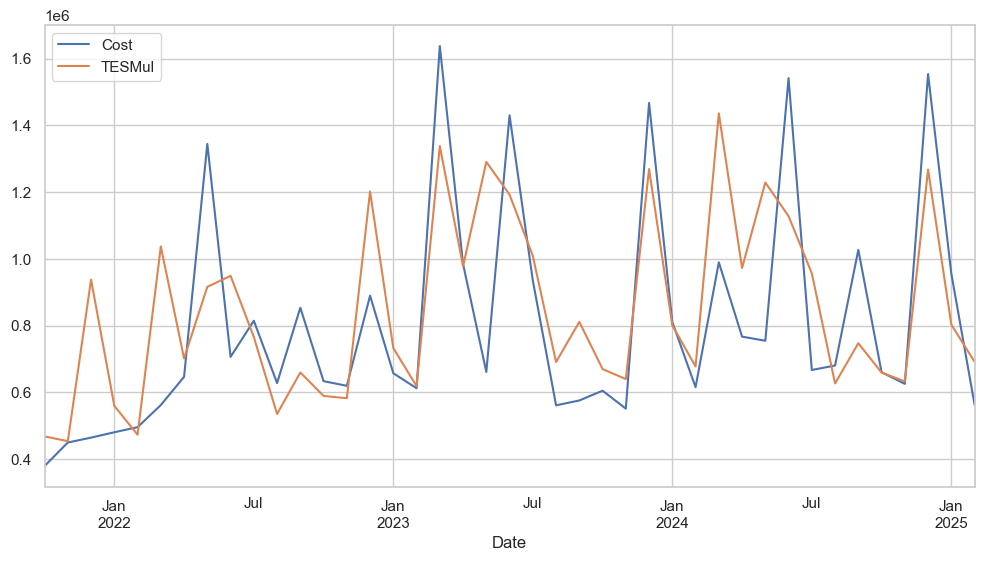

In [83]:
df1[['Cost', 'TESMul']].plot(figsize=(12, 6))

<Axes: xlabel='Date'>

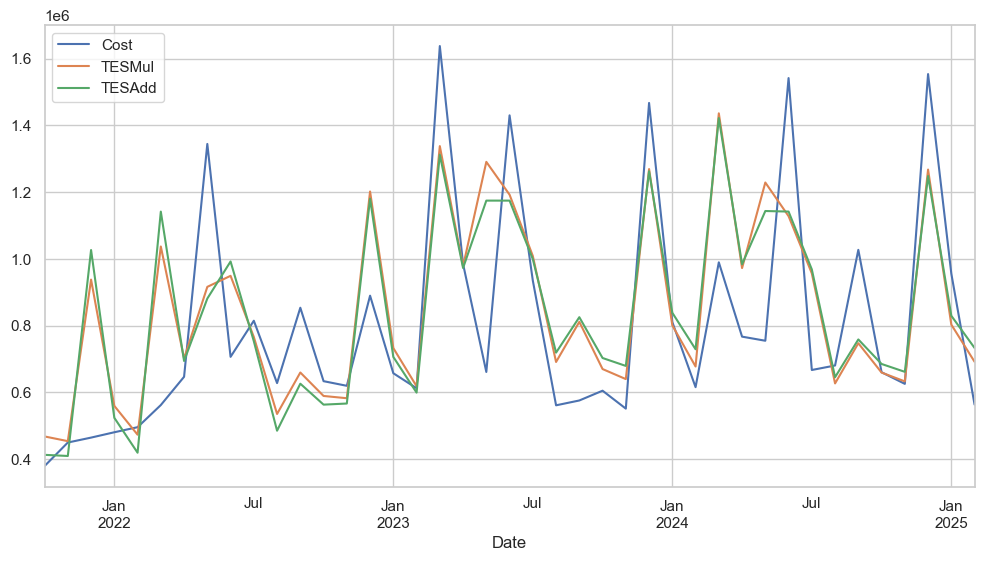

In [84]:
df1[['Cost', 'TESMul', 'TESAdd']].plot(figsize=(12, 6))

# XGBoost Machine Learning Modeling 
https://www.youtube.com/watch?v=vV12dGe_Fho

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns

import xgboost as xgb
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import xgboost as xgb # brew install libomp
#from xgboost.sklearn import XGBClassifier
#from xgboost.sklearn import XGBRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')


In [103]:
#df_ml =combined_df.copy()
#df_ml['Date_str'] = df_ml['Year'].apply(lambda x: str(x)) + "-" + df_ml['Month No'].apply(lambda x: str(x)) + "-01"
#df_ml['Date'] = pd.to_datetime(df_ml['Date_str'])
#df_ml = df_ml.groupby(by=['Date']).agg({'Cost':sum})
#df_ml.sort_index(inplace=True)
#df_ml = df_ml.resample('MS').sum()
#df_ml['Cost'].sum()

In [54]:
df_ml =combined_df.copy()
df_ml['Date_str'] = df_ml['Year'].apply(lambda x: str(x)) + "-" + df_ml['Month No'].apply(lambda x: str(x)) + "-01"
df_ml['Date'] = pd.to_datetime(df_ml['Date_str'])
df_ml.set_index('Date')
df_ml.index = pd.to_datetime(df_ml.index)
df_ml = df_ml.groupby(by=['Date']).agg({'Cost':sum})

/var/folders/bc/rbbb9nc96zd3bj2l2mq3klq00000gp/T/ipykernel_83116/1207078737.py:6: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_ml = df_ml.groupby(by=['Date']).agg({'Cost':sum})


In [55]:
df_ml.columns

Index(['Cost'], dtype='object')

In [176]:
# df_ml.drop(['Month','Year','Name','Account','Service','Enviroment','Month No','Date_str','Unnamed: 0'],axis=1, inplace=True)

In [177]:
# df_ml = df_ml[['Date','Cost']]

In [56]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 42 entries, 2021-10-01 to 2025-03-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Cost    42 non-null     float64
dtypes: float64(1)
memory usage: 672.0 bytes


<Axes: title={'center': 'AWS Total Cost'}, xlabel='Date'>

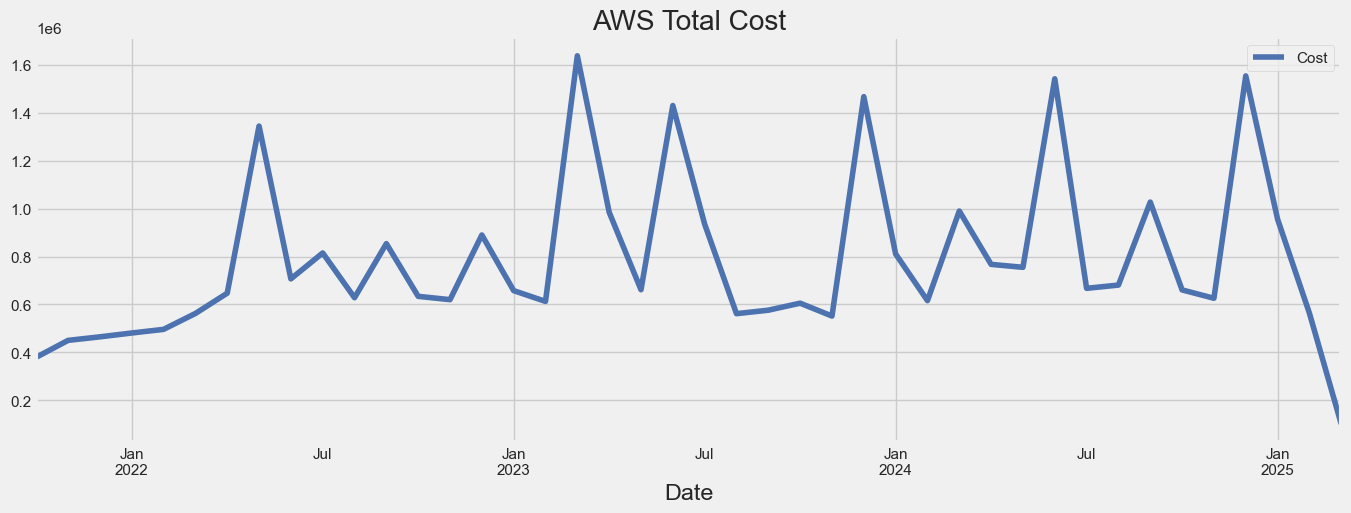

In [57]:
df_ml.plot(style='-', figsize=(15,5), color=color_pal[0], title='AWS Total Cost')

# Train, Split, Test

In [58]:
splite_date = '02-01-2024'### (M-D-Y) 12 months before the last day of a full month we are on the calendar year. <March> 
last_date = '03-01-2025' ### <March> and will keep moving as we move on the calendar
train = df_ml.loc[df_ml.index < splite_date]
test = df_ml.loc[(df_ml.index >= splite_date) & (df_ml.index < last_date)]

In [59]:
train.tail()

,Cost
Date,
2023-09-01,5.759178e+05
2023-10-01,6.052033e+05
2023-11-01,5.514994e+05
2023-12-01,1.467499e+06
2024-01-01,8.108048e+05


In [60]:
test.tail()

,Cost
Date,
2024-10-01,6.605933e+05
2024-11-01,6.257406e+05
2024-12-01,1.554002e+06
2025-01-01,9.560546e+05
2025-02-01,5.635965e+05


/var/folders/bc/rbbb9nc96zd3bj2l2mq3klq00000gp/T/ipykernel_83116/3327140416.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['${:,}'.format(int(val)) for val in current_values])


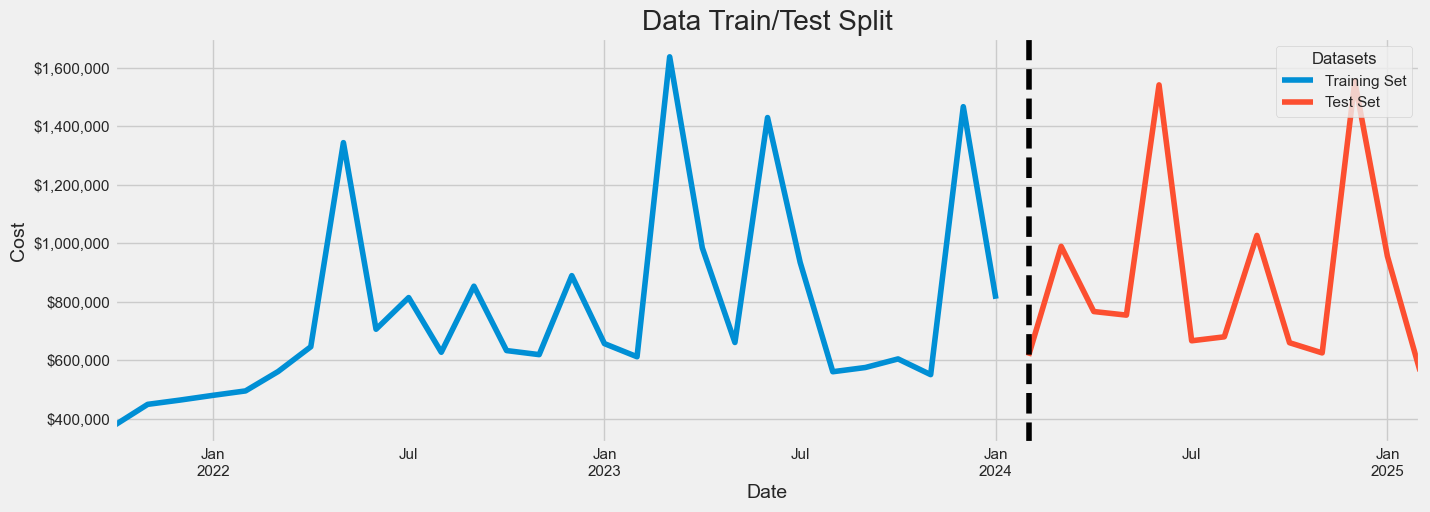

In [63]:
import matplotlib.pyplot as plt
from matplotlib import ticker

fig, ax = plt.subplots(figsize=(15,5))
formatter = ticker.ScalarFormatter()
formatter.set_scientific(False)
ax.yaxis.set_major_formatter(formatter)
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label = 'Test Set')
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['${:,}'.format(int(val)) for val in current_values])
ax.axvline(splite_date, color='black', ls='--')
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Cost", fontsize=14)
ax.legend(['Training Set', 'Test Set'], loc='upper right', title='Datasets')

<Axes: xlabel='Date'>

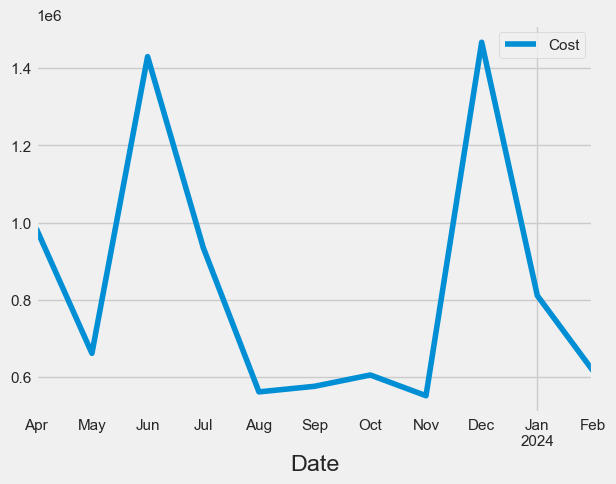

In [64]:
df_ml.loc[(df_ml.index > '03-01-2023') & (df_ml.index < '03-01-2024')].plot() ### MARCH ###

# Feature Creation 

In [65]:
def create_features(df):
    '''
    Create time series features based on time series index
    '''
    df = df.copy()
    df['hour'] = df.index.hour
    df['day_of_week'] = df.index.day_of_week
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['quarter'] = df.index.quarter
    df['1_month_lag'] = df['Cost'].shift(1)
    df['2_month_lag'] = df['Cost'].shift(2)
    df['3_month_lag'] = df['Cost'].shift(3)
    #df['6_month_lag'] = df['Cost'].shift(6)
    #df['12_month_lag'] = df['Cost'].shift(12)
    #df['24_month_lag'] = df['Cost'].shift(24)
    #df['6_month_mean'] = df['Cost'].rolling(window = 6).mean()
    #df['12_month_mean'] = df['Cost'].rolling(window = 12).mean()
    #df['24_month_mean'] = df['Cost'].rolling(window = 24).mean()
    #df['6_month_std'] = df['Cost'].rolling(window = 6).std()
    #df['12_month_std'] = df['Cost'].rolling(window = 12).std()
    #df['24_month_std'] = df['Cost'].rolling(window = 24).std()
    #df['6_month_max'] = df['Cost'].rolling(window = 6).max()
    #df['12_month_max'] = df['Cost'].rolling(window = 12).max()
    #df['24_month_max'] = df['Cost'].rolling(window = 24).max()
    #df['6_month_min'] = df['Cost'].rolling(window = 6).min()
    #df['12_month_min'] = df['Cost'].rolling(window = 12).min()
    #df['24_month_min'] = df['Cost'].rolling(window = 24).min()
    return df




In [66]:
df_ml = create_features(df_ml)

In [67]:
df_ml.sample(10)

,Cost,hour,day_of_week,month,year,quarter,1_month_lag,2_month_lag,3_month_lag
Date,,,,,,,,,
2023-07-01,935199.450999,0,5,7,2023,3,1.430313e+06,6.614069e+05,9.849516e+05
2024-05-01,754922.179877,0,2,5,2024,2,7.672112e+05,9.899129e+05,6.158228e+05
2024-01-01,810804.834403,0,0,1,2024,1,1.467499e+06,5.514994e+05,6.052033e+05
2024-11-01,625740.615532,0,4,11,2024,4,6.605933e+05,1.027315e+06,6.807256e+05
2021-11-01,449911.873052,0,0,11,2021,4,3.794357e+05,NaN,NaN
2023-01-01,657555.146269,0,6,1,2023,1,8.899484e+05,6.198833e+05,6.337723e+05
2023-09-01,575917.792403,0,4,9,2023,3,5.614320e+05,9.351995e+05,1.430313e+06
2022-08-01,628009.118636,0,0,8,2022,3,8.148950e+05,7.066702e+05,1.344622e+06
2023-08-01,561431.974079,0,1,8,2023,3,9.351995e+05,1.430313e+06,6.614069e+05


# Visualize our Feature / Target Relationship 

/var/folders/bc/rbbb9nc96zd3bj2l2mq3klq00000gp/T/ipykernel_83116/3667831974.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['${:,}'.format(int(val)) for val in current_values])


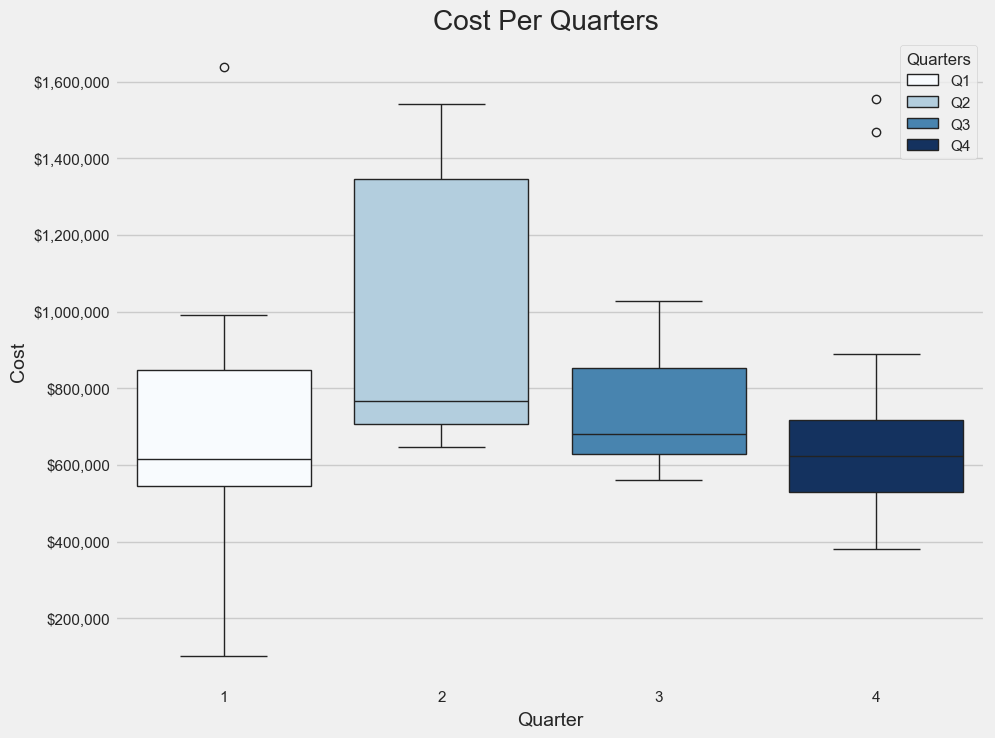

In [68]:
fix, ax = plt.subplots(figsize=(10,8))
formatter = ticker.ScalarFormatter()
formatter.set_scientific(False)
ax.yaxis.set_major_formatter(formatter)
sns.boxplot(data=df_ml, x='quarter', y='Cost', palette='Blues', hue='quarter')
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['${:,}'.format(int(val)) for val in current_values])
ax.set_title('Cost Per Quarters ')
ax.legend(['Q1', 'Q2', 'Q3', 'Q4'], loc='upper right', title='Quarters')
ax.set_xlabel("Quarter", fontsize=14)
ax.set_ylabel("Cost", fontsize=14)
plt.show()

# Create our Model

In [69]:
train = create_features(train)
test = create_features(test)


In [70]:
train.columns

Index(['Cost', 'hour', 'day_of_week', 'month', 'year', 'quarter',
       '1_month_lag', '2_month_lag', '3_month_lag'],
      dtype='object')

In [71]:
FEATURES = train.columns[1:]
TARGET = train.columns[0]

In [72]:
FEATURES

Index(['hour', 'day_of_week', 'month', 'year', 'quarter', '1_month_lag',
       '2_month_lag', '3_month_lag'],
      dtype='object')

In [73]:
TARGET

'Cost'

In [74]:
X_train = train[FEATURES]
y_train = train[TARGET]


In [75]:
X_test = test[FEATURES]
y_test = test[TARGET]

In [2]:
# Initialize the XGBoost Regressor with desired parameters
# reg = xgb.XGBRegressor()
'''
reg = XGBRegressor(objective='reg:squarederror',
                        n_estimators=100,
                        learning_rate=0.1,
                        max_depth=3,
                        random_state=42)
'''

"\nreg = XGBRegressor(objective='reg:squarederror',\n                        n_estimators=100,\n                        learning_rate=0.1,\n                        max_depth=3,\n                        random_state=42)\n"

In [786]:
'''
reg = XGBRegressor(objective='reg:squarederror',
                        n_estimators=1000,
                        learning_rate=0.1,
                        max_depth=3,
                        early_stopping_rounds = 50,
                        random_state=42)
'''

"\nreg = XGBRegressor(objective='reg:squarederror',\n                        n_estimators=1000,\n                        learning_rate=0.1,\n                        max_depth=3,\n                        early_stopping_rounds = 50,\n                        random_state=42)\n"

In [76]:
# regresion model
reg = XGBRegressor(n_estimators = 12000,
                   early_stopping_rounds = 40,
                   learning_rate=0.01,
                   max_depth=2,
                   random_state=42
                   )

#reg = xgb.XGBRegressor()

reg.fit(X_train, y_train,
        eval_set = [(X_train,y_train), (X_test, y_test)],
        verbose = 100)




[0]	validation_0-rmse:323116.08910	validation_1-rmse:337657.81729
[100]	validation_0-rmse:248992.49966	validation_1-rmse:305956.65158
[200]	validation_0-rmse:192708.73023	validation_1-rmse:271169.25590
[300]	validation_0-rmse:158460.38408	validation_1-rmse:246795.14817
[400]	validation_0-rmse:132532.00491	validation_1-rmse:225878.42697
[500]	validation_0-rmse:110719.26277	validation_1-rmse:207290.47652
[600]	validation_0-rmse:94255.27531	validation_1-rmse:193870.77061
[700]	validation_0-rmse:80473.34971	validation_1-rmse:184700.98942
[800]	validation_0-rmse:69040.51748	validation_1-rmse:178647.90924
[900]	validation_0-rmse:58614.45866	validation_1-rmse:174924.61772
[1000]	validation_0-rmse:50308.72233	validation_1-rmse:171921.50498
[1074]	validation_0-rmse:44729.83951	validation_1-rmse:171752.75848


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=40,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=12000, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

# Feature Importance

In [77]:
fi = pd.DataFrame(data=reg.feature_importances_, index=reg.feature_names_in_,columns=['importance'])
fi


,importance
hour,0.000000
day_of_week,0.115765
month,0.199580
year,0.109578
quarter,0.000000
1_month_lag,0.107883
2_month_lag,0.281451
3_month_lag,0.185743


<Axes: title={'center': 'Feature Importance'}>

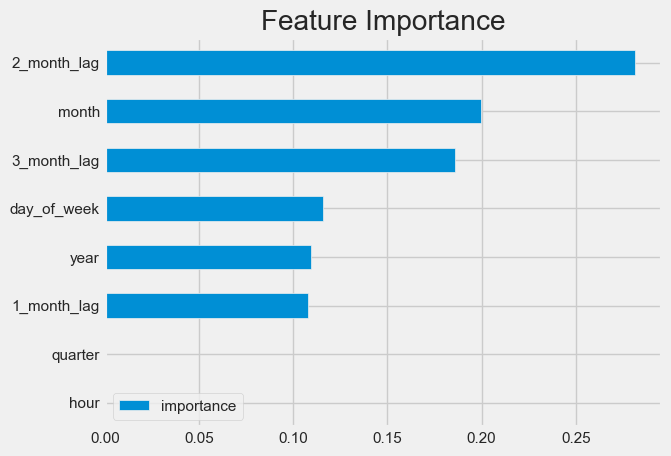

In [78]:
fi.sort_values('importance').plot(kind='barh', title="Feature Importance")

# Forecast on the Test

In [79]:
reg.predict(X_test)

array([ 591520.9 , 1010033.9 ,  883823.1 ,  752892.94, 1288536.  ,
        826207.9 ,  771016.5 ,  798116.1 ,  548532.06,  718470.3 ,
       1179506.4 ,  756830.5 ,  690347.56], dtype=float32)

In [80]:
test['predictions'] = reg.predict(X_test)
test

,Cost,hour,day_of_week,month,year,quarter,1_month_lag,2_month_lag,3_month_lag,predictions
Date,,,,,,,,,,
2024-02-01,6.158228e+05,0,3,2,2024,1,NaN,NaN,NaN,5.915209e+05
2024-03-01,9.899129e+05,0,4,3,2024,1,6.158228e+05,NaN,NaN,1.010034e+06
2024-04-01,7.672112e+05,0,0,4,2024,2,9.899129e+05,6.158228e+05,NaN,8.838231e+05
2024-05-01,7.549222e+05,0,2,5,2024,2,7.672112e+05,9.899129e+05,6.158228e+05,7.528929e+05
2024-06-01,1.542014e+06,0,5,6,2024,2,7.549222e+05,7.672112e+05,9.899129e+05,1.288536e+06
2024-07-01,6.672585e+05,0,0,7,2024,3,1.542014e+06,7.549222e+05,7.672112e+05,8.262079e+05
2024-08-01,6.807256e+05,0,3,8,2024,3,6.672585e+05,1.542014e+06,7.549222e+05,7.710165e+05
2024-09-01,1.027315e+06,0,6,9,2024,3,6.807256e+05,6.672585e+05,1.542014e+06,7.981161e+05
2024-10-01,6.605933e+05,0,1,10,2024,4,1.027315e+06,6.807256e+05,6.672585e+05,5.485321e+05


In [81]:
df_ml1 = df_ml.merge(test[['predictions']], how='left', left_index=True, right_index=True)
df_ml1

,Cost,hour,day_of_week,month,year,quarter,1_month_lag,2_month_lag,3_month_lag,predictions
Date,,,,,,,,,,
2021-10-01,3.794357e+05,0,4,10,2021,4,NaN,NaN,NaN,NaN
2021-11-01,4.499119e+05,0,0,11,2021,4,3.794357e+05,NaN,NaN,NaN
2021-12-01,4.646831e+05,0,2,12,2021,4,4.499119e+05,3.794357e+05,NaN,NaN
2022-01-01,4.806844e+05,0,5,1,2022,1,4.646831e+05,4.499119e+05,3.794357e+05,NaN
2022-02-01,4.958688e+05,0,1,2,2022,1,4.806844e+05,4.646831e+05,4.499119e+05,NaN
2022-03-01,5.622309e+05,0,1,3,2022,1,4.958688e+05,4.806844e+05,4.646831e+05,NaN
2022-04-01,6.468500e+05,0,4,4,2022,2,5.622309e+05,4.958688e+05,4.806844e+05,NaN
2022-05-01,1.344622e+06,0,6,5,2022,2,6.468500e+05,5.622309e+05,4.958688e+05,NaN
2022-06-01,7.066702e+05,0,2,6,2022,2,1.344622e+06,6.468500e+05,5.622309e+05,NaN


/var/folders/bc/rbbb9nc96zd3bj2l2mq3klq00000gp/T/ipykernel_83116/643989966.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['${:,}'.format(int(val)) for val in current_values])


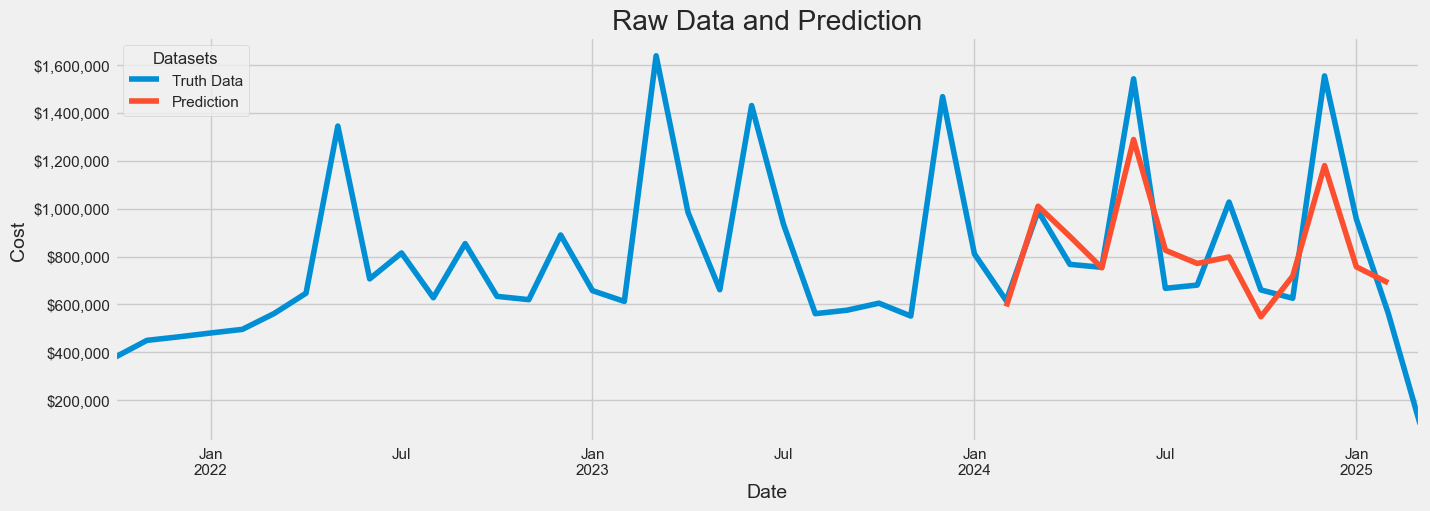

In [82]:
ax = df_ml1[['Cost']].plot(figsize=(15,5))
formatter = ticker.ScalarFormatter()
formatter.set_scientific(False)
ax.yaxis.set_major_formatter(formatter)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['${:,}'.format(int(val)) for val in current_values])
df_ml1['predictions'].plot(ax=ax, style='-')
ax.set_title('Raw Data and Prediction')
ax.legend(['Truth Data', 'Prediction'], loc='upper left', title='Datasets')
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Cost", fontsize=14)
plt.show()

In [83]:
score = np.sqrt(mean_squared_error(test['Cost'], test['predictions']))
print(f'RMSE Score on Test Set: {score:,.2f}')
num = "{:,.2f}".format(score)
print('RMSE Score on Test Set:', num)

RMSE Score on Test Set: 171,409.91
RMSE Score on Test Set: 171,409.91


In [84]:
reg.save_model("AWS_xgboost_model.json")  # Save the Model

# Calculate Error

- look at best and wost predicted months

In [85]:
test['error'] = np.abs(test['Cost'] - test['predictions'])

In [ ]:
# tets['date_index'] = test.index.date

In [86]:
test.groupby('Date')['error'].mean().sort_values(ascending=False).head(5) # Worst 

Date
2024-12-01    374495.560316
2024-06-01    253477.753067
2024-09-01    229198.461506
2025-01-01    199224.132754
2024-07-01    158949.368662
Name: error, dtype: float64

In [87]:
test.groupby('Date')['error'].mean().sort_values(ascending=True).head(5) # Best

Date
2024-05-01     2029.242377
2024-03-01    20120.953384
2024-02-01    24301.932976
2024-08-01    90290.869030
2024-11-01    92729.696968
Name: error, dtype: float64

- Cross Validation 
- Hyper Parameter Tunning 

# Now Let's do Forcast Predictions

In [88]:
from xgboost import XGBRegressor
model = XGBRegressor()
model.load_model("AWS_xgboost_model.json")  # Load trained mode
#model = reg

In [89]:
Cost = df_ml[-12:]['Cost'].values
Cost

array([ 767211.23927792,  754922.17987719, 1542013.75306699,
        667258.5063381 ,  680725.63096972, 1027314.58650558,
        660593.27243416,  625740.61553184, 1554001.93531605,
        956054.6327542 ,  563596.49421164,  100927.44533276])

In [95]:
Date_str = df_ml[-12:].index.values + pd.to_timedelta(52, 'W')
Date_str

array(['2025-03-31T00:00:00.000000000', '2025-04-30T00:00:00.000000000',
       '2025-05-31T00:00:00.000000000', '2025-06-30T00:00:00.000000000',
       '2025-07-31T00:00:00.000000000', '2025-08-31T00:00:00.000000000',
       '2025-09-30T00:00:00.000000000', '2025-10-31T00:00:00.000000000',
       '2025-11-30T00:00:00.000000000', '2025-12-31T00:00:00.000000000',
       '2026-01-31T00:00:00.000000000', '2026-02-28T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [96]:
data = {'Date_str': Date_str,'Cost' : Cost}
df_now = pd.DataFrame(data)
df_now

,Date_str,Cost
0,2025-03-31,7.672112e+05
1,2025-04-30,7.549222e+05
2,2025-05-31,1.542014e+06
3,2025-06-30,6.672585e+05
4,2025-07-31,6.807256e+05
5,2025-08-31,1.027315e+06
6,2025-09-30,6.605933e+05
7,2025-10-31,6.257406e+05
8,2025-11-30,1.554002e+06
9,2025-12-31,9.560546e+05


In [97]:
df_now['Date'] = pd.to_datetime(df_now['Date_str'])
df_now.set_index('Date')
df_now.index = pd.to_datetime(df_now.index)
df_now = df_now.groupby(by=['Date']).agg({'Cost':sum})

/var/folders/bc/rbbb9nc96zd3bj2l2mq3klq00000gp/T/ipykernel_83116/2121192341.py:4: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_now = df_now.groupby(by=['Date']).agg({'Cost':sum})


In [98]:
df_now

,Cost
Date,
2025-03-31,7.672112e+05
2025-04-30,7.549222e+05
2025-05-31,1.542014e+06
2025-06-30,6.672585e+05
2025-07-31,6.807256e+05
2025-08-31,1.027315e+06
2025-09-30,6.605933e+05
2025-10-31,6.257406e+05
2025-11-30,1.554002e+06


In [99]:
df_now = create_features(df_now)


In [100]:
df_now

,Cost,hour,day_of_week,month,year,quarter,1_month_lag,2_month_lag,3_month_lag
Date,,,,,,,,,
2025-03-31,7.672112e+05,0,0,3,2025,1,NaN,NaN,NaN
2025-04-30,7.549222e+05,0,2,4,2025,2,7.672112e+05,NaN,NaN
2025-05-31,1.542014e+06,0,5,5,2025,2,7.549222e+05,7.672112e+05,NaN
2025-06-30,6.672585e+05,0,0,6,2025,2,1.542014e+06,7.549222e+05,7.672112e+05
2025-07-31,6.807256e+05,0,3,7,2025,3,6.672585e+05,1.542014e+06,7.549222e+05
2025-08-31,1.027315e+06,0,6,8,2025,3,6.807256e+05,6.672585e+05,1.542014e+06
2025-09-30,6.605933e+05,0,1,9,2025,3,1.027315e+06,6.807256e+05,6.672585e+05
2025-10-31,6.257406e+05,0,4,10,2025,4,6.605933e+05,1.027315e+06,6.807256e+05
2025-11-30,1.554002e+06,0,6,11,2025,4,6.257406e+05,6.605933e+05,1.027315e+06


In [101]:
df_now.drop('Cost', axis=1, inplace=True)


In [102]:
reg.predict(df_now)

array([ 625218.  ,  823475.06,  999377.3 ,  876229.5 ,  990872.  ,
        829591.56,  548532.06,  725419.5 ,  864235.3 ,  677033.94,
        690347.56, 1203018.4 ], dtype=float32)

In [103]:
df_now['predictions'] = reg.predict(df_now)

In [104]:
df_now

,hour,day_of_week,month,year,quarter,1_month_lag,2_month_lag,3_month_lag,predictions
Date,,,,,,,,,
2025-03-31,0,0,3,2025,1,NaN,NaN,NaN,6.252180e+05
2025-04-30,0,2,4,2025,2,7.672112e+05,NaN,NaN,8.234751e+05
2025-05-31,0,5,5,2025,2,7.549222e+05,7.672112e+05,NaN,9.993773e+05
2025-06-30,0,0,6,2025,2,1.542014e+06,7.549222e+05,7.672112e+05,8.762295e+05
2025-07-31,0,3,7,2025,3,6.672585e+05,1.542014e+06,7.549222e+05,9.908720e+05
2025-08-31,0,6,8,2025,3,6.807256e+05,6.672585e+05,1.542014e+06,8.295916e+05
2025-09-30,0,1,9,2025,3,1.027315e+06,6.807256e+05,6.672585e+05,5.485321e+05
2025-10-31,0,4,10,2025,4,6.605933e+05,1.027315e+06,6.807256e+05,7.254195e+05
2025-11-30,0,6,11,2025,4,6.257406e+05,6.605933e+05,1.027315e+06,8.642353e+05


In [105]:
df_ml['Cost'].values[-13]

np.float64(989912.9216155177)

In [108]:
df_now

,hour,day_of_week,month,year,quarter,1_month_lag,2_month_lag,3_month_lag,predictions
Date,,,,,,,,,
2025-03-31,0,0,3,2025,1,NaN,NaN,NaN,6.252180e+05
2025-04-30,0,2,4,2025,2,7.672112e+05,NaN,NaN,8.234751e+05
2025-05-31,0,5,5,2025,2,7.549222e+05,7.672112e+05,NaN,9.993773e+05
2025-06-30,0,0,6,2025,2,1.542014e+06,7.549222e+05,7.672112e+05,8.762295e+05
2025-07-31,0,3,7,2025,3,6.672585e+05,1.542014e+06,7.549222e+05,9.908720e+05
2025-08-31,0,6,8,2025,3,6.807256e+05,6.672585e+05,1.542014e+06,8.295916e+05
2025-09-30,0,1,9,2025,3,1.027315e+06,6.807256e+05,6.672585e+05,5.485321e+05
2025-10-31,0,4,10,2025,4,6.605933e+05,1.027315e+06,6.807256e+05,7.254195e+05
2025-11-30,0,6,11,2025,4,6.257406e+05,6.605933e+05,1.027315e+06,8.642353e+05


In [111]:
df_new = pd.DataFrame()

In [114]:
df1_date =  df_ml.index.values
df1_date = np.append(df1_date, df_now.index.values)

In [115]:
df1_cost = df_ml['Cost'].values
df1_cost = np.append(df1_cost, df_now['predictions'].values)

In [116]:
len(df1_date)

54

In [117]:
len(df1_cost)

54

In [118]:
df_new['Date'] = df1_date
df_new['Cost'] = df1_cost


In [119]:
df_new.set_index('Date')
df_new.index = pd.to_datetime(df_new.index)
df_new_1 = df_new.groupby(['Date']).agg(Cost=('Cost','sum'))

<Axes: xlabel='Date'>

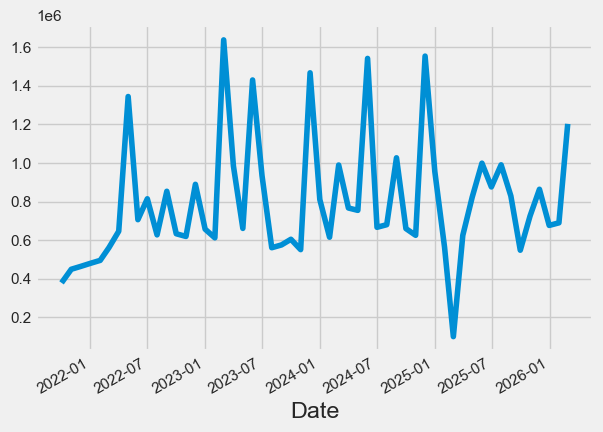

In [120]:
df_new_1['Cost'].plot()

In [121]:
from statsmodels.tsa.filters.hp_filter import hpfilter
#get the values
cost_cycle, cost_trend = hpfilter(df_new_1['Cost'], lamb=1600) # 1600 for Quarterly data, 6.25  for yerly data and 129600 for monthly data

In [122]:
df_new_1['Trend'] = cost_trend

In [123]:
df_new_1

,Cost,Trend
Date,,
2021-10-01,3.794357e+05,496076.491875
2021-11-01,4.499119e+05,524357.362044
2021-12-01,4.646831e+05,552565.331704
2022-01-01,4.806844e+05,580580.971915
2022-02-01,4.958688e+05,608229.927361
2022-03-01,5.622309e+05,635275.407395
2022-04-01,6.468500e+05,661410.395650
2022-05-01,1.344622e+06,686282.222957
2022-06-01,7.066702e+05,709529.119913


/var/folders/bc/rbbb9nc96zd3bj2l2mq3klq00000gp/T/ipykernel_83116/2605701244.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['${:,}'.format(int(val)) for val in current_values])


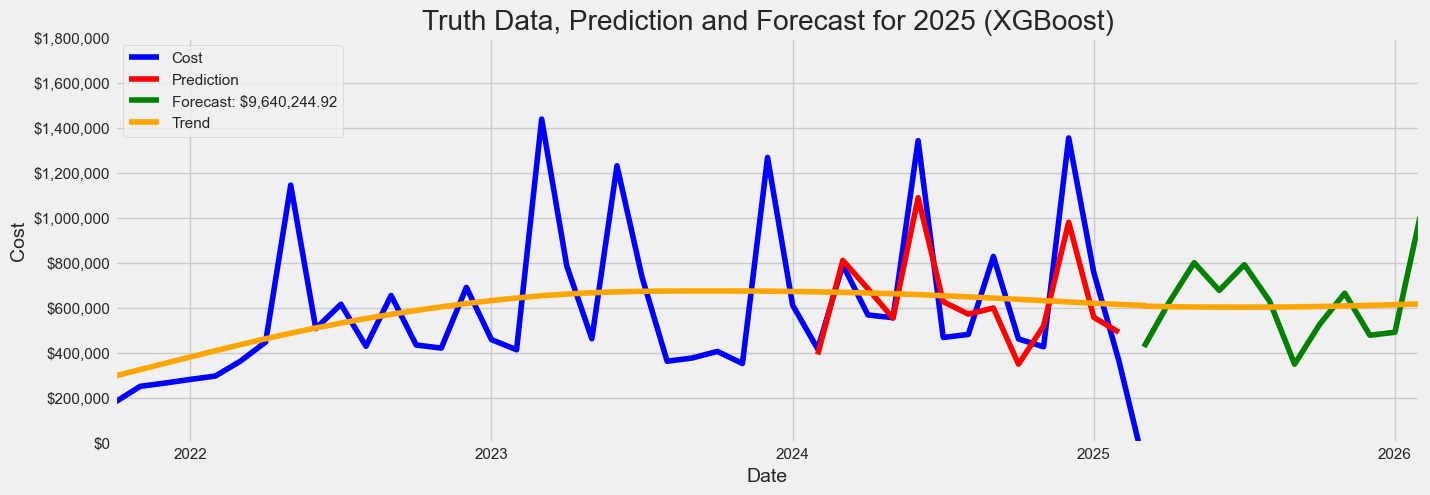

In [128]:
yhat = df_now['predictions'].values
#"{:,.2f}".format(yhat[0:-1].sum()+df_ml['Cost'].values[-13])

fig1, ax = plt.subplots(figsize=(15,5))
df_ml[['Cost']].plot(ax=ax, style='-', label= 'Truth Data', color='blue')
df_ml1['predictions'].plot(ax=ax, style='-', label= 'Prediction', color='red')
df_now['predictions'].plot(ax=ax, style='-', label= 'Forecast: '+str("${:,.2f}".format(yhat[0:-1].sum()+df_ml['Cost'].values[-13])), color='green')
#df1[['Trend']].plot(ax=ax).autoscale(axis='x', tight=True)
df_new_1[['Trend']].plot(ax=ax, label='Trend', color='orange')
formatter = ticker.ScalarFormatter()
formatter.set_scientific(False)
ax.yaxis.set_major_formatter(formatter)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['${:,}'.format(int(val)) for val in current_values])
ax.set_title('Truth Data, Prediction and Forecast for 2025 (XGBoost)')
ax.legend(loc='upper left', title='')
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Cost", fontsize=14)
ax.set_ylim(200000, 2000000)
plt.show()

# Using Prophet

In [130]:
from prophet import Prophet

In [131]:
df_ml_p =combined_df.copy()
df_ml_p['Date_str'] = df_ml_p['Year'].apply(lambda x: str(x)) + "-" + df_ml_p['Month No'].apply(lambda x: str(x)) + "-01"
df_ml_p['ds'] = pd.to_datetime(df_ml_p['Date_str'])
#df_ml_p.set_index('ds')
#df_ml_p.index = pd.to_datetime(df_ml_p.index)
df_ml_p = df_ml_p.groupby(['ds']).agg(y=('Cost','sum'))

In [132]:
df_ml_p

,y
ds,
2021-10-01,3.794357e+05
2021-11-01,4.499119e+05
2021-12-01,4.646831e+05
2022-01-01,4.806844e+05
2022-02-01,4.958688e+05
2022-03-01,5.622309e+05
2022-04-01,6.468500e+05
2022-05-01,1.344622e+06
2022-06-01,7.066702e+05


In [133]:
df_p = pd.DataFrame()


In [134]:
df_p['ds'] = df_ml_p.index
df_p['y'] = df_ml_p['y'].values


In [135]:
# df_p = df_p.iloc[1:-1,:]
df_p

,ds,y
0,2021-10-01,3.794357e+05
1,2021-11-01,4.499119e+05
2,2021-12-01,4.646831e+05
3,2022-01-01,4.806844e+05
4,2022-02-01,4.958688e+05
5,2022-03-01,5.622309e+05
6,2022-04-01,6.468500e+05
7,2022-05-01,1.344622e+06
8,2022-06-01,7.066702e+05
9,2022-07-01,8.148950e+05


In [141]:
model = Prophet()
model.fit(df_p)

13:20:00 - cmdstanpy - INFO - Chain [1] start processing
13:20:00 - cmdstanpy - INFO - Chain [1] done processing


In [142]:
# Python
future = model.make_future_dataframe(periods=12, freq='M')   # Create a future DataFrame for 12 months
forecast = model.predict(future)                             # Generate the forecast
future.tail()

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


,ds
49,2025-10-31
50,2025-11-30
51,2025-12-31
52,2026-01-31
53,2026-02-28


In [143]:
#forecast[['yhat', 'yhat_lower', 'yhat_upper']].sum()
#forecast[['yhat', 'yhat_lower', 'yhat_upper']]
yhat_low = forecast.iloc[-13:,:]['yhat_lower'].values
yhat = forecast.iloc[-13:,:]['yhat'].values
yhat_high = forecast.iloc[-13:,:]['yhat_upper'].values
#ax.legend(title="Total Cost $"+str("{:,.2f}".format(t)))
print("{:,.2f}".format(yhat_low[0:-1].sum()) , "{:,.2f}".format(yhat[0:-1].sum()) , "{:,.2f}".format(yhat_high[0:-1].sum()))





6,832,664.53 10,765,105.37 14,629,051.28


/var/folders/bc/rbbb9nc96zd3bj2l2mq3klq00000gp/T/ipykernel_83116/218562983.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['${:,}'.format(int(val)) for val in current_values])


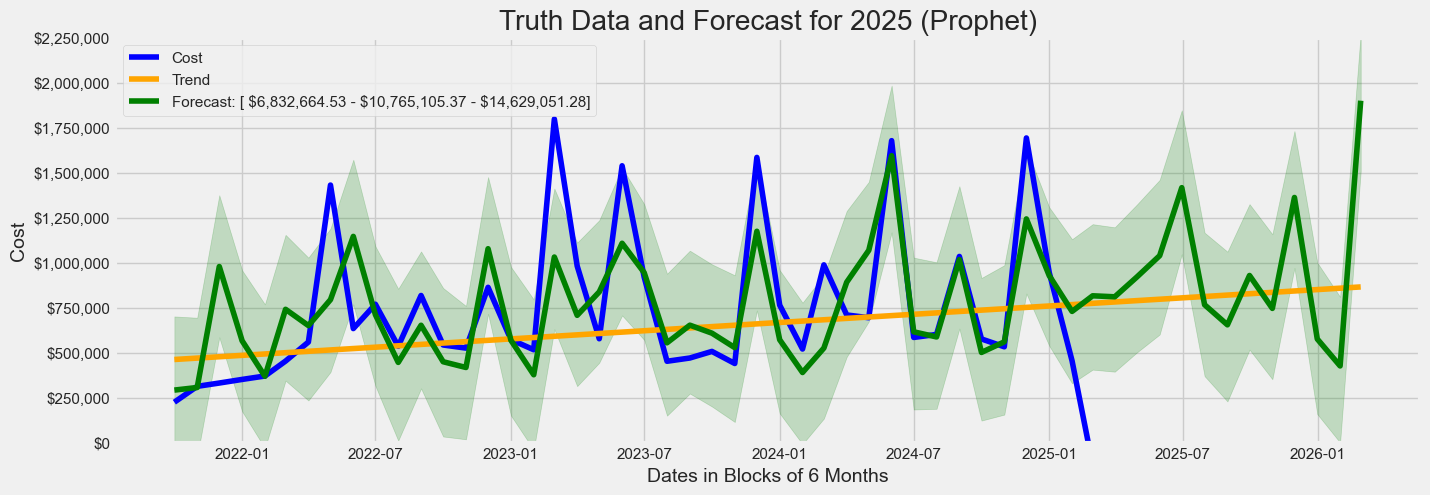

In [144]:
from prophet.plot import plot, plot_components
from matplotlib import pyplot as plt

yhat = forecast.iloc[-13:,:]['yhat'].values
fig, ax = plt.subplots(figsize=(15,5))
plt.plot(df_p['ds'], df_p['y'], label='Cost',color='blue')
plt.plot(forecast['ds'], forecast['trend'], label='Trend',color='orange')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast: [ ' + str("${:,.2f}".format(yhat_low[0:-1].sum())) + " - " + str("${:,.2f}".format(yhat[0:-1].sum())) + 
                                                                      " - " + str("${:,.2f}".format(yhat_high[0:-1].sum()))+ ']',color='green')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='green', alpha=0.2)
#plt.plot(forecast['ds'], forecast['yhat_lower'], label='Forecast',color='green', linestyle='--')
#plt.plot(forecast['ds'], forecast['yhat_upper'], label='Forecast',color='green', linestyle='--')
#model.plot(forecast, ax=ax)       # Plot the forecast
#plot(model, forecast)               # Plot the forecast
#plot_components(model, forecast)    # Plot the forecast components
formatter = ticker.ScalarFormatter()
formatter.set_scientific(False)
ax.yaxis.set_major_formatter(formatter)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['${:,}'.format(int(val)) for val in current_values])
ax.set_title('Truth Data and Forecast for 2025 (Prophet)')
#ax.legend(['Truth Data', 'Prediction','Forecast'], loc='upper left', title='Datesets')
ax.legend(loc='upper left', title='')
ax.set_xlabel("Dates in Blocks of 6 Months", fontsize=14)
ax.set_ylabel("Cost", fontsize=14)
ax.set_ylim(200000, 2000000)
plt.show()

In [145]:
forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ds                          54 non-null     datetime64[ns]
 1   trend                       54 non-null     float64       
 2   yhat_lower                  54 non-null     float64       
 3   yhat_upper                  54 non-null     float64       
 4   trend_lower                 54 non-null     float64       
 5   trend_upper                 54 non-null     float64       
 6   additive_terms              54 non-null     float64       
 7   additive_terms_lower        54 non-null     float64       
 8   additive_terms_upper        54 non-null     float64       
 9   yearly                      54 non-null     float64       
 10  yearly_lower                54 non-null     float64       
 11  yearly_upper                54 non-null     float64       
 

In [146]:
forecast['ds'].dt.month_name()
forecast['ds'].dt.year
forecast['ds'].dt.month


0     10
1     11
2     12
3      1
4      2
5      3
6      4
7      5
8      6
9      7
10     8
11     9
12    10
13    11
14    12
15     1
16     2
17     3
18     4
19     5
20     6
21     7
22     8
23     9
24    10
25    11
26    12
27     1
28     2
29     3
30     4
31     5
32     6
33     7
34     8
35     9
36    10
37    11
38    12
39     1
40     2
41     3
42     3
43     4
44     5
45     6
46     7
47     8
48     9
49    10
50    11
51    12
52     1
53     2
Name: ds, dtype: int32

In [147]:
# Python
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
49,2025-10-31,7.962796e+05,4.699194e+05,1.127827e+06
50,2025-11-30,1.289390e+06,9.524827e+05,1.597165e+06
51,2025-12-31,6.604362e+05,3.337739e+05,9.792990e+05
52,2026-01-31,5.406606e+05,2.127334e+05,8.584210e+05
53,2026-02-28,1.719495e+06,1.418887e+06,2.036203e+06


In [148]:
forecast.describe().T

,count,mean,min,25%,50%,75%,max,std
ds,54,2023-12-16 06:40:00,2021-10-01 00:00:00,2022-11-08 12:00:00,2023-12-16 12:00:00,2025-01-24 06:00:00,2026-02-28 00:00:00,NaN
trend,54.0,730690.116443,569287.347768,650061.059759,730734.619469,811758.475024,891781.41796,95819.338527
yhat_lower,54.0,506396.878335,104434.43363,328641.418789,462840.875655,643481.522796,1418886.941512,266425.838318
yhat_upper,54.0,1144082.397945,754313.603659,973429.880744,1095857.089509,1306552.646924,2036203.426105,268218.988609
trend_lower,54.0,730690.114323,569287.347768,650061.059759,730734.619469,811758.475024,891781.396036,95819.335305
trend_upper,54.0,730690.118359,569287.347768,650061.059759,730734.619469,811758.475024,891781.437602,95819.341437
additive_terms,54.0,95263.770146,-345515.699186,-95283.154308,49164.06314,228954.712899,827713.988495,246802.831163
additive_terms_lower,54.0,95263.770146,-345515.699186,-95283.154308,49164.06314,228954.712899,827713.988495,246802.831163
additive_terms_upper,54.0,95263.770146,-345515.699186,-95283.154308,49164.06314,228954.712899,827713.988495,246802.831163
yearly,54.0,95263.770146,-345515.699186,-95283.154308,49164.06314,228954.712899,827713.988495,246802.831163


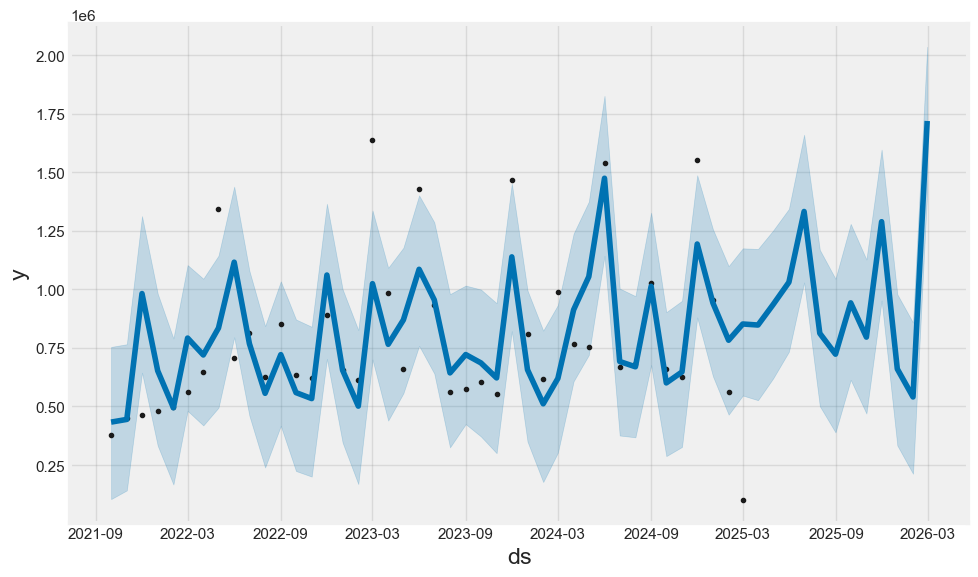

In [149]:
# Python
fig1 = model.plot(forecast)

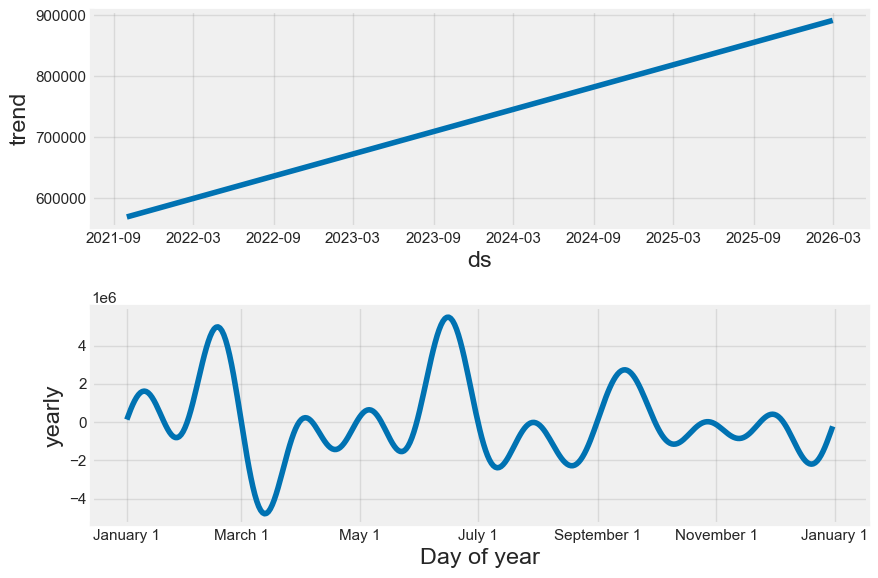

In [150]:
# Python
fig2 = model.plot_components(forecast)

# Using Deep Learning RNN

https://machinelearningmastery.com/time-series-prediction-with-deep-learning-in-python-with-keras/

In [92]:
df_dl =combined_df.copy()
df_dl['Date_str'] = df_dl['Year'].apply(lambda x: str(x)) + "-" + df_dl['Month No'].apply(lambda x: str(x)) + "-01"
df_dl['Date'] = pd.to_datetime(df_dl['Date_str'])
#df_dl.set_index('Date')
#df_dl.index = pd.to_datetime(df_dl.index)
df_dl = df_dl.groupby(by=['Date']).agg(Cost=('Cost','sum'))

In [93]:
df_dl

,Cost
Date,
2021-10-01,3.794357e+05
2021-11-01,4.499119e+05
2021-12-01,4.646831e+05
2022-01-01,4.806844e+05
2022-02-01,4.958688e+05
2022-03-01,5.622309e+05
2022-04-01,6.468500e+05
2022-05-01,1.344622e+06
2022-06-01,7.066702e+05


In [94]:
dataset_temp = df_dl[['Cost']]

In [95]:
dataset_temp

,Cost
Date,
2021-10-01,3.794357e+05
2021-11-01,4.499119e+05
2021-12-01,4.646831e+05
2022-01-01,4.806844e+05
2022-02-01,4.958688e+05
2022-03-01,5.622309e+05
2022-04-01,6.468500e+05
2022-05-01,1.344622e+06
2022-06-01,7.066702e+05


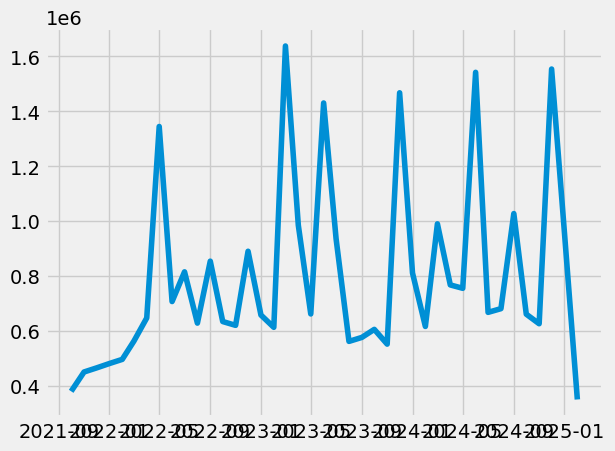

In [96]:
plt.plot(dataset_temp)
plt.show()

In [97]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [98]:

# load the dataset
# dataframe = pd.read_csv('airline-passengers.csv', usecols=[1], engine='python')
dataframe = dataset_temp.copy()
dataset = dataframe.values
dataset = dataset.astype('float32')

In [99]:

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

27 14


In [100]:

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [109]:

# reshape into X=t and Y=t+1
look_back = 2
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [110]:

# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(8, input_shape=(look_back,), activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=200, batch_size=2, verbose=2)

Epoch 1/200
12/12 - 0s - 28ms/step - loss: 1049581125632.0000
Epoch 2/200
12/12 - 0s - 2ms/step - loss: 974590509056.0000
Epoch 3/200
12/12 - 0s - 1ms/step - loss: 912007626752.0000
Epoch 4/200
12/12 - 0s - 1ms/step - loss: 847796568064.0000
Epoch 5/200
12/12 - 0s - 1ms/step - loss: 797833101312.0000
Epoch 6/200
12/12 - 0s - 1ms/step - loss: 748035506176.0000
Epoch 7/200
12/12 - 0s - 1ms/step - loss: 698657800192.0000
Epoch 8/200
12/12 - 0s - 1ms/step - loss: 656173891584.0000
Epoch 9/200
12/12 - 0s - 1ms/step - loss: 612665917440.0000
Epoch 10/200
12/12 - 0s - 1ms/step - loss: 572009676800.0000
Epoch 11/200
12/12 - 0s - 902us/step - loss: 534580920320.0000
Epoch 12/200
12/12 - 0s - 1ms/step - loss: 497837637632.0000
Epoch 13/200
12/12 - 0s - 960us/step - loss: 462801076224.0000
Epoch 14/200
12/12 - 0s - 1ms/step - loss: 431452979200.0000
Epoch 15/200
12/12 - 0s - 1ms/step - loss: 399334473728.0000
Epoch 16/200
12/12 - 0s - 1ms/step - loss: 369516740608.0000
Epoch 17/200
12/12 - 0s - 9

In [111]:
import math
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 122321166336.00 MSE (349744.43 RMSE)
Test Score: 190304976896.00 MSE (436239.59 RMSE)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


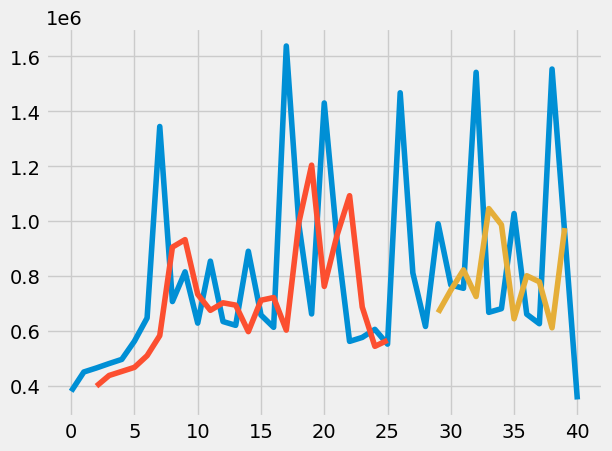

In [112]:
...
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

Epoch 1/400
12/12 - 0s - 38ms/step - loss: 526040170496.0000
Epoch 2/400
12/12 - 0s - 1ms/step - loss: 489825763328.0000
Epoch 3/400
12/12 - 0s - 2ms/step - loss: 452050780160.0000
Epoch 4/400
12/12 - 0s - 1ms/step - loss: 414629888000.0000
Epoch 5/400
12/12 - 0s - 1ms/step - loss: 375282532352.0000
Epoch 6/400
12/12 - 0s - 1ms/step - loss: 337785815040.0000
Epoch 7/400
12/12 - 0s - 1ms/step - loss: 296300871680.0000
Epoch 8/400
12/12 - 0s - 976us/step - loss: 248333303808.0000
Epoch 9/400
12/12 - 0s - 1ms/step - loss: 204603326464.0000
Epoch 10/400
12/12 - 0s - 1ms/step - loss: 161354514432.0000
Epoch 11/400
12/12 - 0s - 1ms/step - loss: 134789808128.0000
Epoch 12/400
12/12 - 0s - 935us/step - loss: 118076506112.0000
Epoch 13/400
12/12 - 0s - 1ms/step - loss: 107734540288.0000
Epoch 14/400
12/12 - 0s - 999us/step - loss: 105101164544.0000
Epoch 15/400
12/12 - 0s - 1ms/step - loss: 102315212800.0000
Epoch 16/400
12/12 - 0s - 921us/step - loss: 102729424896.0000
Epoch 17/400
12/12 - 0s 

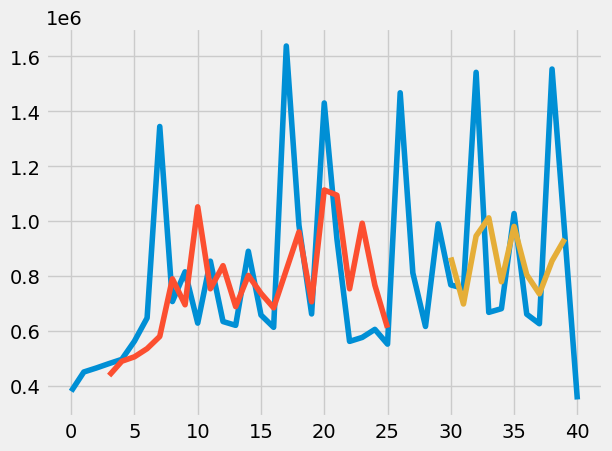

In [143]:
# Multilayer Perceptron to Predict International Airline Passengers (t+1, given t, t-1, t-2)
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

# load the dataset
#dataframe = read_csv('airline-passengers.csv', usecols=[1], engine='python')
dataframe = dataset_temp.copy()
dataset = dataframe.values
dataset = dataset.astype('float32')
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape dataset
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(12, input_shape=(look_back,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=400, batch_size=2, verbose=2)
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# Using ARIMA and LSTM

https://www.datacamp.com/tutorial/arima

https://neptune.ai/blog/arima-vs-prophet-vs-lstm



In [42]:
df_arima =combined_df.copy()
df_arima['Date_str'] = df_arima['Year'].apply(lambda x: str(x)) + "-" + df_arima['Month No'].apply(lambda x: str(x)) + "-01"
df_arima['Date'] = pd.to_datetime(df_arima['Date_str'])
df_arima.set_index('Date',inplace=True)
df_arima.index = pd.to_datetime(df_arima.index)
df_arima = df_arima.groupby(by=['Date']).agg(Cost=('Cost','sum'))
df_arima.sort_index(inplace=True)

In [43]:
df_arima

,Cost
Date,
2021-10-01,3.794357e+05
2021-11-01,4.499119e+05
2021-12-01,4.646831e+05
2022-01-01,4.806844e+05
2022-02-01,4.958688e+05
2022-03-01,5.622309e+05
2022-04-01,6.468500e+05
2022-05-01,1.344622e+06
2022-06-01,7.066702e+05


In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

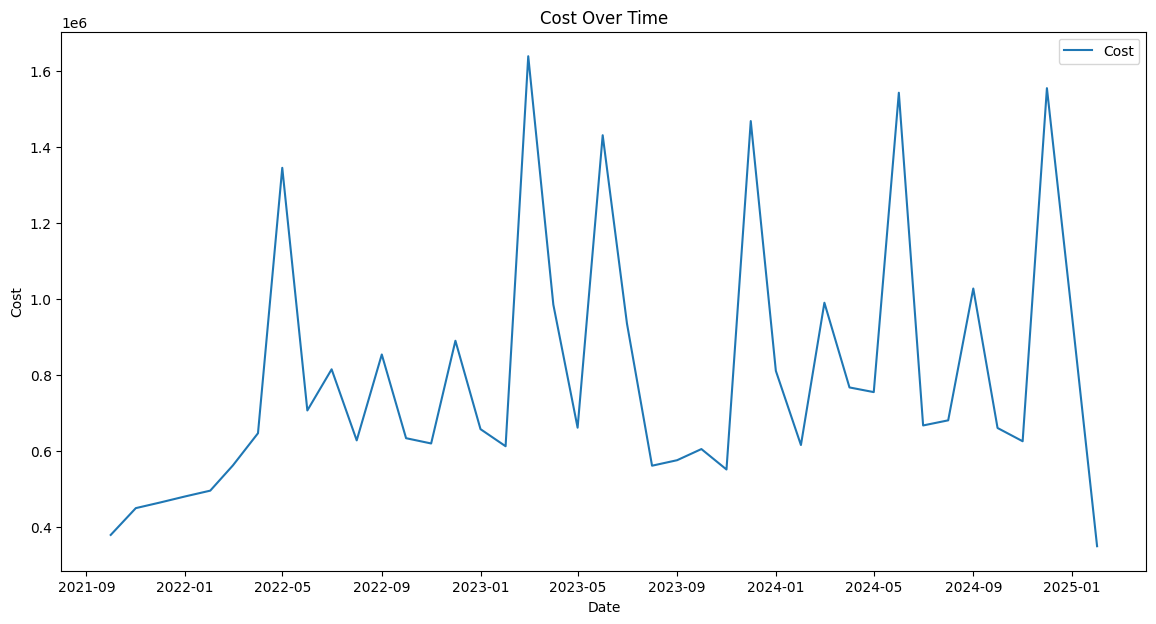

In [45]:
# Plotting the original Close price
plt.figure(figsize=(14, 7))
plt.plot(df_arima.index, df_arima["Cost"], label='Cost')
plt.title('Cost Over Time')
plt.xlabel('Date')
plt.ylabel('Cost')
plt.legend()
plt.show()

In [46]:
# Perform the Augmented Dickey-Fuller test on the original series
result_original = adfuller(df_arima["Cost"])

print(f"ADF Statistic (Original): {result_original[0]:.4f}")
print(f"p-value (Original): {result_original[1]:.4f}")

if result_original[1] < 0.05:
    print("Interpretation: The original series is Stationary.\n")
else:
    print("Interpretation: The original series is Non-Stationary.\n")

# Apply first-order differencing
df_arima['Cost_Diff'] = df_arima["Cost"].diff()

# Perform the Augmented Dickey-Fuller test on the differenced series
result_diff = adfuller(df_arima['Cost_Diff'].dropna())
print(f"ADF Statistic (Differenced): {result_diff[0]:.4f}")
print(f"p-value (Differenced): {result_diff[1]:.4f}")
if result_diff[1] < 0.05:
    print("Interpretation: The differenced series is Stationary.")
else:
    print("Interpretation: The differenced series is Non-Stationary.")


ADF Statistic (Original): -3.5551
p-value (Original): 0.0067
Interpretation: The original series is Stationary.

ADF Statistic (Differenced): -5.2199
p-value (Differenced): 0.0000
Interpretation: The differenced series is Stationary.


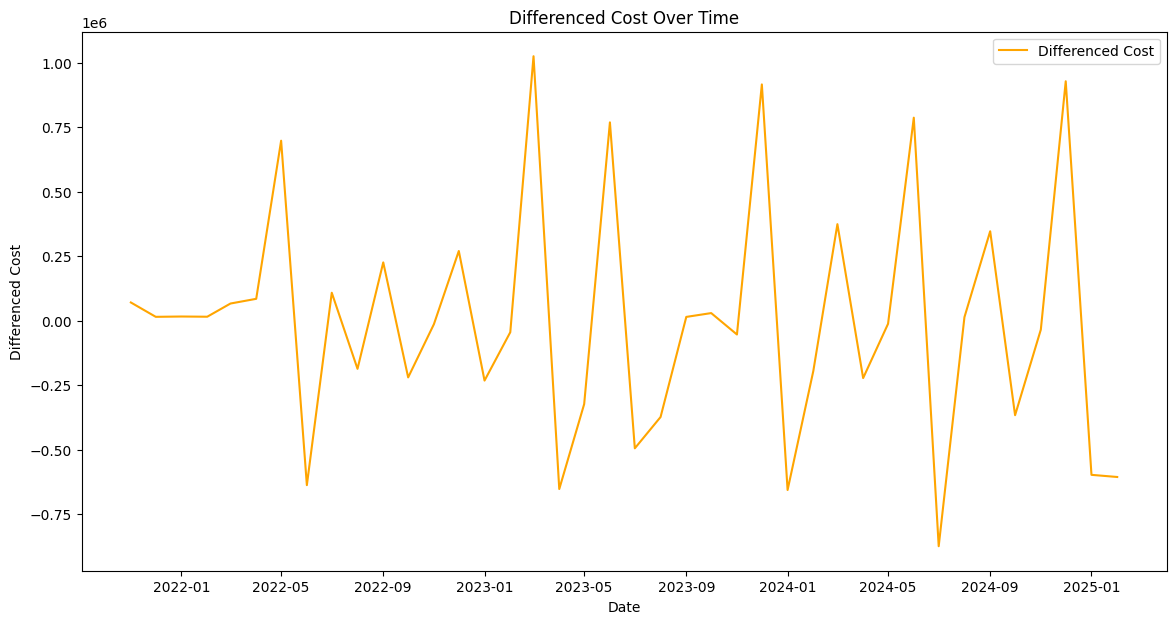

In [47]:
# Plotting the differenced Close price
plt.figure(figsize=(14, 7))
plt.plot(df_arima.index, df_arima['Cost_Diff'], label='Differenced Cost', color='orange')
plt.title('Differenced Cost Over Time')
plt.xlabel('Date')
plt.ylabel('Differenced Cost')
plt.legend()
plt.show()

In [49]:
df_arima

,Cost,Cost_Diff
Date,,
2021-10-01,3.794357e+05,NaN
2021-11-01,4.499119e+05,7.047620e+04
2021-12-01,4.646831e+05,1.477126e+04
2022-01-01,4.806844e+05,1.600131e+04
2022-02-01,4.958688e+05,1.518433e+04
2022-03-01,5.622309e+05,6.636215e+04
2022-04-01,6.468500e+05,8.461910e+04
2022-05-01,1.344622e+06,6.977715e+05
2022-06-01,7.066702e+05,-6.379514e+05


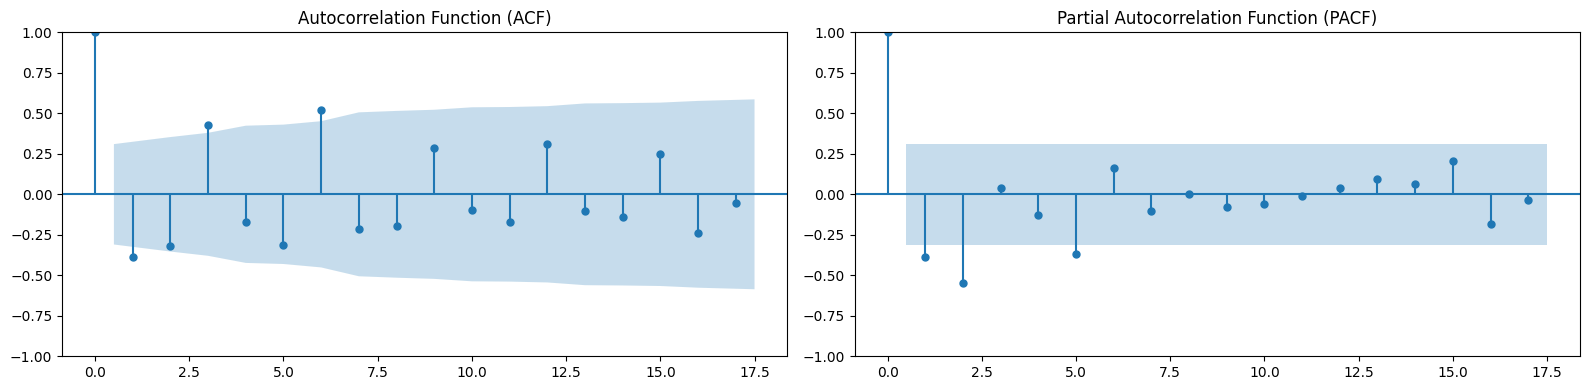

In [51]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot ACF and PACF for the differenced series
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

# ACF plot
#plot_acf(df_arima['Cost_Diff'].dropna(), lags=40, ax=axes[0])
plot_acf(df_arima['Cost_Diff'].dropna(), ax=axes[0])
axes[0].set_title('Autocorrelation Function (ACF)')

# PACF plot
#plot_pacf(df_arima['Cost_Diff'].dropna(), lags=40, ax=axes[1])
plot_pacf(df_arima['Cost_Diff'].dropna(), ax=axes[1])
axes[1].set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

In [52]:
# Split data into train and test
train_size = int(len(df_arima) * 0.8)
train, test = df_arima.iloc[:train_size], df_arima.iloc[train_size:]

# Fit ARIMA model
model = ARIMA(train["Cost"], order=(1,1,1))
model_fit = model.fit()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


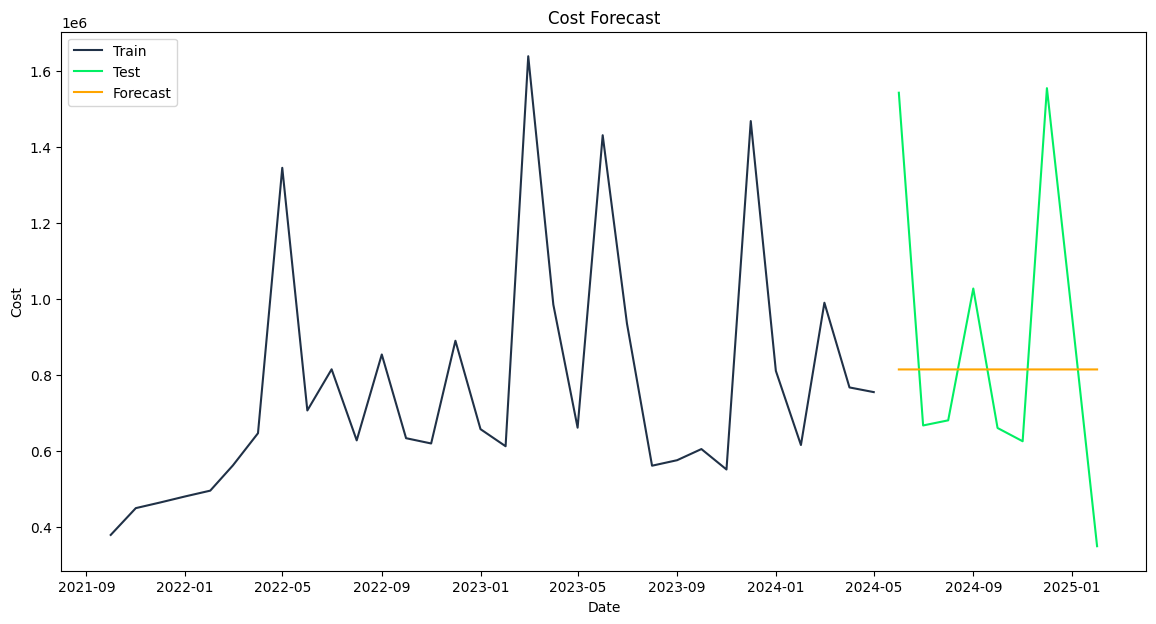

In [59]:
# Forecast
forecast = model_fit.forecast(steps=len(test))

# Plot the results with specified colors
plt.figure(figsize=(14,7))
plt.plot(train.index, train["Cost"], label='Train', color='#203147')
plt.plot(test.index, test["Cost"], label='Test', color='#01ef63')
plt.plot(test.index, forecast, label='Forecast', color='orange')
plt.title('Cost Forecast')
plt.xlabel('Date')
plt.ylabel('Cost')
plt.legend()
plt.show()


In [54]:
print(f"AIC: {model_fit.aic}")
print(f"BIC: {model_fit.bic}")

AIC: 883.0276586955194
BIC: 887.3296203089749


In [55]:
forecast = forecast[:len(test)]
test_close = test["Cost"][:len(forecast)]

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_close, forecast))
print(f"RMSE: {rmse:.4f}")

RMSE: 402260.1391


# finding new services in 2024

In [120]:
services_df = total_per_service_df[total_per_service_df['Total'] > 10]
x = services_df.sort_values(by=['Service','Year'])
x = x.reset_index()


In [121]:

total = 0
for index, row in x.iterrows():
    #print(row['Year'], row['Service'], row['Total'], index)
    #print(x.iloc[index,0])
    if row['Year'] == 2025:
        if index > 0 :
            #print("-1 ",x.iloc[index-1,1], x.iloc[index-1,0], x.iloc[index-1,2], index-1)
            #print(" * ",row['Year'], row['Service'], row['Total'], index)
            #print("+1 ",x.iloc[index+1,1], x.iloc[index+1,0], x.iloc[index+1,2], index+1)
            if x.iloc[index-1,0] == row['Service']:
                None
                #print(".",end="")
                # print("-1 ",x.iloc[index-1,1], x.iloc[index-1,0], x.iloc[index-1,2], index-1)
                # print(" * ",row['Year'], row['Service'], row['Total'], index)
            else:
                #print("")
                #print("-1 ",x.iloc[index-1,1], x.iloc[index-1,0], x.iloc[index-1,2], index-1)
                print(" * ",row['Year'], row['Service'], row['Total'], index)
                total = total + row['Total']
        else:
            if x.iloc[index+1,0] == row['Service']:
                None
                #print(".",end="")
                # print("-1 ",x.iloc[index-1,1], x.iloc[index-1,0], x.iloc[index-1,2], index-1)
                # print(" * ",row['Year'], row['Service'], row['Total'], index)
            else:
                #print("")
                #print("+1 ",x.iloc[index+1,1], x.iloc[index+1,0], x.iloc[index+1,2], index+1)
                print(" * ",row['Year'], row['Service'], row['Total'], index)  
                total = total + row['Total']        
print("Total $ in New Services ",total)



 *  2025 AWS Backup 177.0471520664 4
 *  2025 AWS Certificate Manager 1456.0 9
 *  2025 AWS CloudTrail 4267.7932087043 14
 *  2025 AWS Config 5597.39271 19
 *  2025 AWS Cost Explorer 40.7862 23
 *  2025 AWS Database Migration Service 2741.6741690379 30
 *  2025 AWS Directory Service 494.12366115 35
 *  2025 AWS Elemental MediaLive 27.0816 40
 *  2025 AWS Global Accelerator 33.8570972152 47
 *  2025 AWS Glue 14.4360912696 51
 *  2025 AWS Key Management Service 328.820238538 56
 *  2025 AWS Lambda 4082.2132638381 61
 *  2025 AWS Secrets Manager 212.0174806031 69
 *  2025 AWS Security Hub 710.1294109 74
 *  2025 AWS Support (Enterprise) 49246.7885 79
 *  2025 AWS Transfer Family 203.8023883235 84
 *  2025 AWS WAF 1581.0202725838 89
 *  2025 AWS X-Ray 47.56615955 94
 *  2025 Amazon API Gateway 97.2144196157 99
 *  2025 Amazon CloudFront 23456.071145917 106
 *  2025 Amazon Cognito 91.25025 111
 *  2025 Amazon Detective 307.2288293262 116
 *  2025 Amazon DocumentDB (with MongoDB compatibilit